In [1]:
from nga.utils import load_config, plane_eval_ray_bundle, save_as_image, convert_to_transformed_space
from nerfstudio.utils.eval_utils import eval_load_checkpoint
from nerfstudio.cameras.rays import RayBundle
from nerfstudio.utils import colormaps
from nerfstudio.utils.io import load_from_json

from PIL import Image
from pathlib import Path
import yaml
import torch
import json
import numpy as np
import OpenEXR, Imath
import matplotlib.pyplot as plt

In [2]:


def load_metadata(config):
    if config.data.suffix == ".json":
        meta = load_from_json(config.data)
        data_dir = config.data.parent
    else:
        meta = load_from_json(config.data / "transforms.json")
        data_dir = config.data
    return meta, data_dir

In [11]:
# config_path = "outputs/pattern_plane1_500_50_50/instant-ngp/2023-09-21_184858/config.yml"
# config_path = "outputs/pattern_plane1_500_50_50/tensorf/2023-09-21_181951/config.yml"
config_path = "outputs/pattern_plane1_500_50_50/nerfacto/2023-09-21_184924/config.yml"
# config_path = "outputs/pattern_plane1_720x480/tensorf/2023-09-18_225930/config.yml"
# config_path = "outputs/pattern_plane1_720x480/kplanes/2023-09-18_222327/config.yml"

plane_dimensions=(1.0,1.0)

config = load_config(config_path)
config.load_dir = config.get_checkpoint_dir()

meta, data_dir = load_metadata(config)


In [12]:

# setup pipeline (which includes the DataManager)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipeline = config.pipeline.setup(device=device, test_mode="val")
pipeline.eval()


checkpoint_path, step = eval_load_checkpoint(config, pipeline)
results_path = config.get_base_dir() / "results.json"
render_output_path = config.get_base_dir() / "renders"
render_output_path.mkdir(parents=True, exist_ok=True)

[22:01:59] Auto image downscale factor of 1                                                 ]8;id=698150;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=617424;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#349\349]8;;\

            Dataset is overriding train_indices to [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, ]8;id=868603;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=630512;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#200\200]8;;\
           60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,                              
           80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,                              
           100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,                              
           116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,                              
           132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,                              
           148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,                              
           164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,                              
           180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,                              
           196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,                              
           212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,                              
           228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,                              
           244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,                              
           260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,                              
           276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,                              
           292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,                              
           308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,                              
           324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,                              
           340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,                              
           356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,                              
           372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,                              
           388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,                              
           404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,                              
           420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,                              
           436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,                              
           452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,                              
           468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,                              
           484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,                              
           500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515,                              
           516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,                              
           532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,

            Dataset is overriding val_indices to [550, 551, 552, 553, 554, 555, 556, 557,   ]8;id=512900;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=225791;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#200\200]8;;\
           558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573,                              
           574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589,                              
           590, 591, 592, 593, 594, 595, 596, 597, 598, 599]                                                            

Setting up training dataset...

Caching all 500 images.

Output()

Setting up evaluation dataset...

Caching all 50 images.

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/pattern_plane1_500_50_50/nerfacto/2023-09-21_184924/nerfstudio_models/step-000029999.ckpt

torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([

/tmp/ipykernel_103885/748743828.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))


torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([480, 720, 4]) torch.Size([480, 720, 4])
torch.Size([

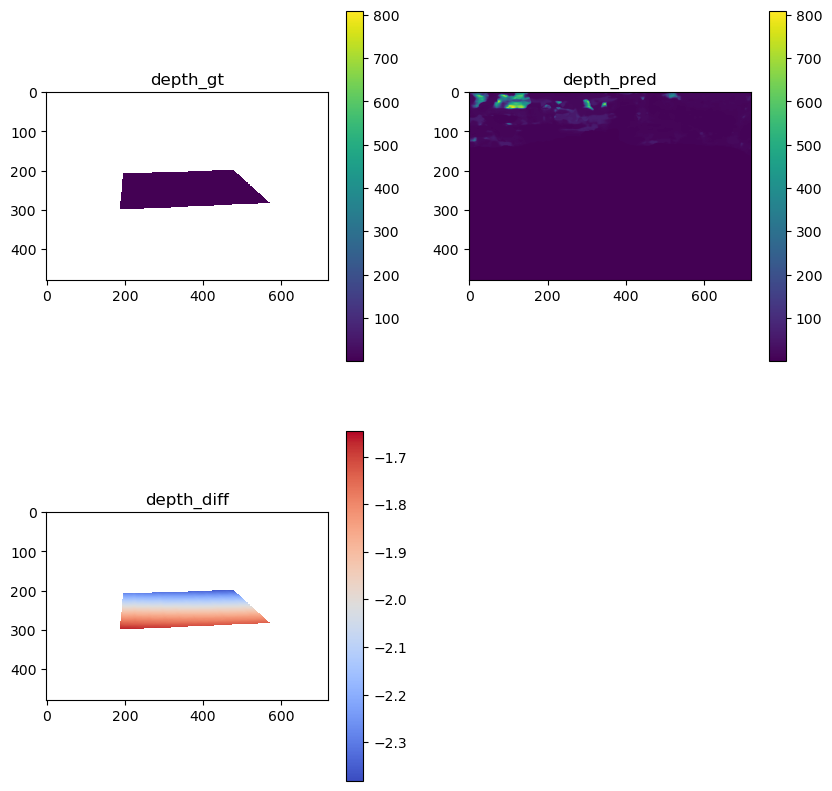

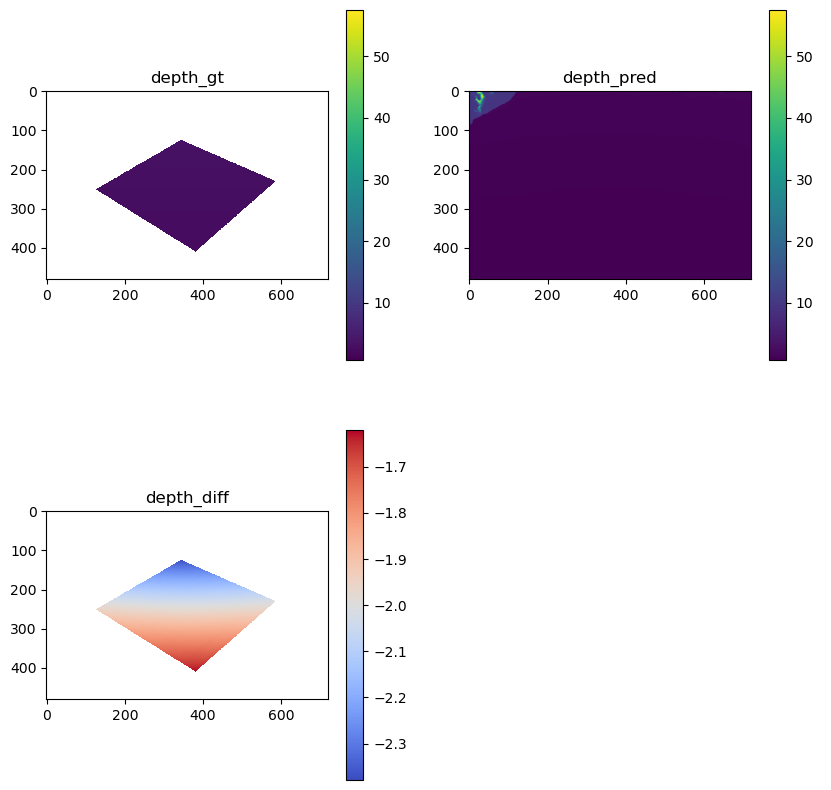

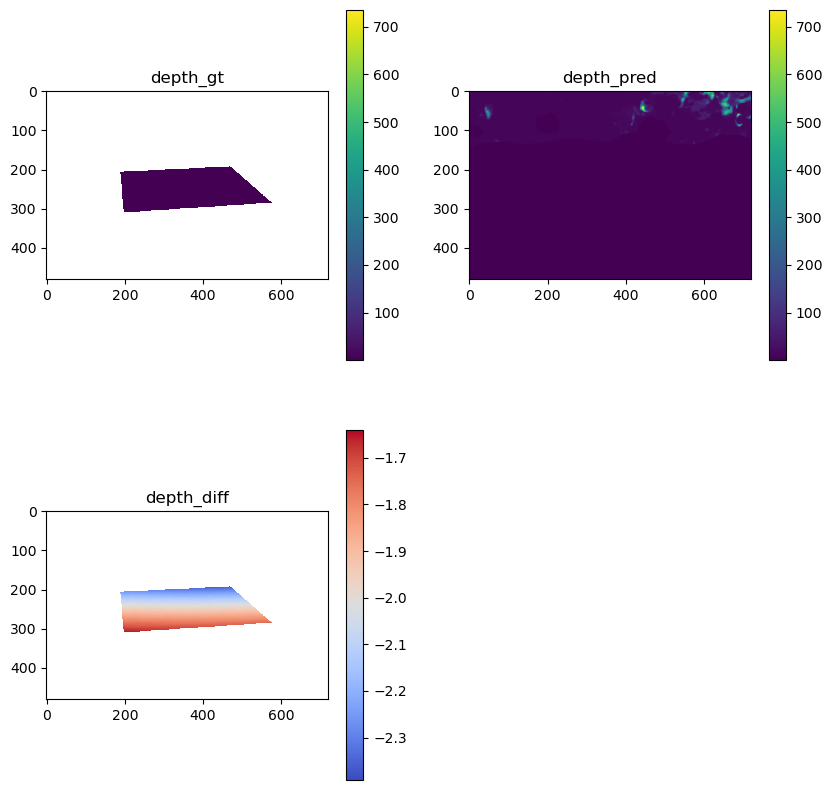

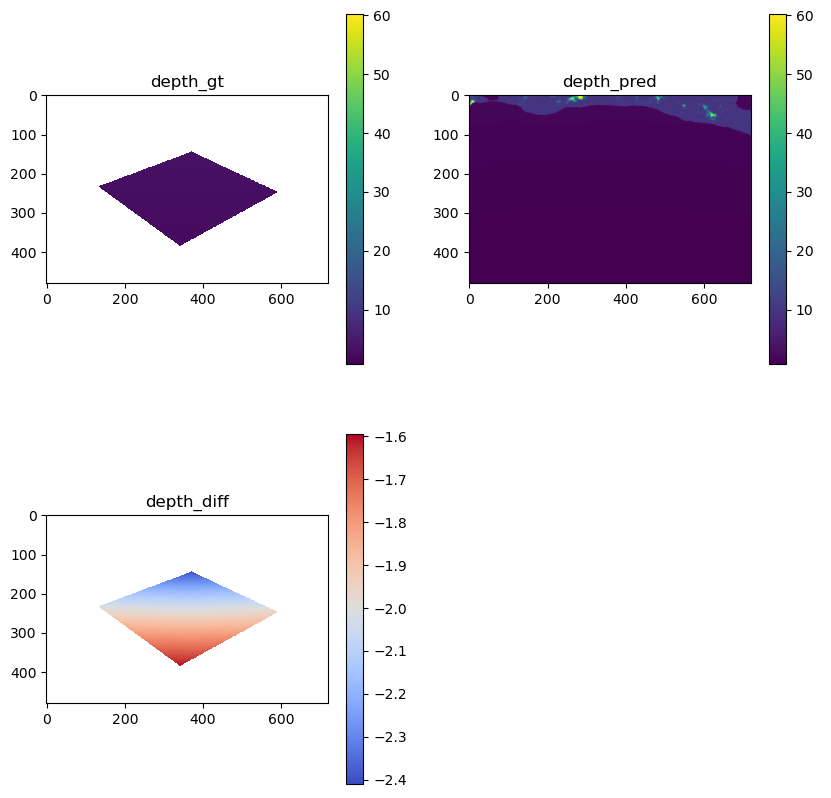

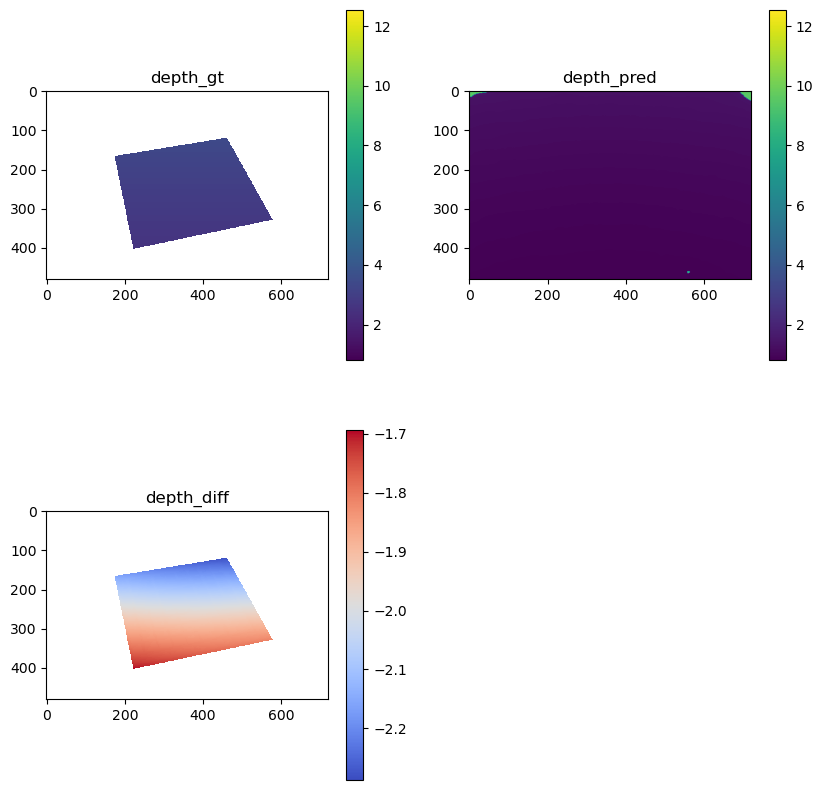

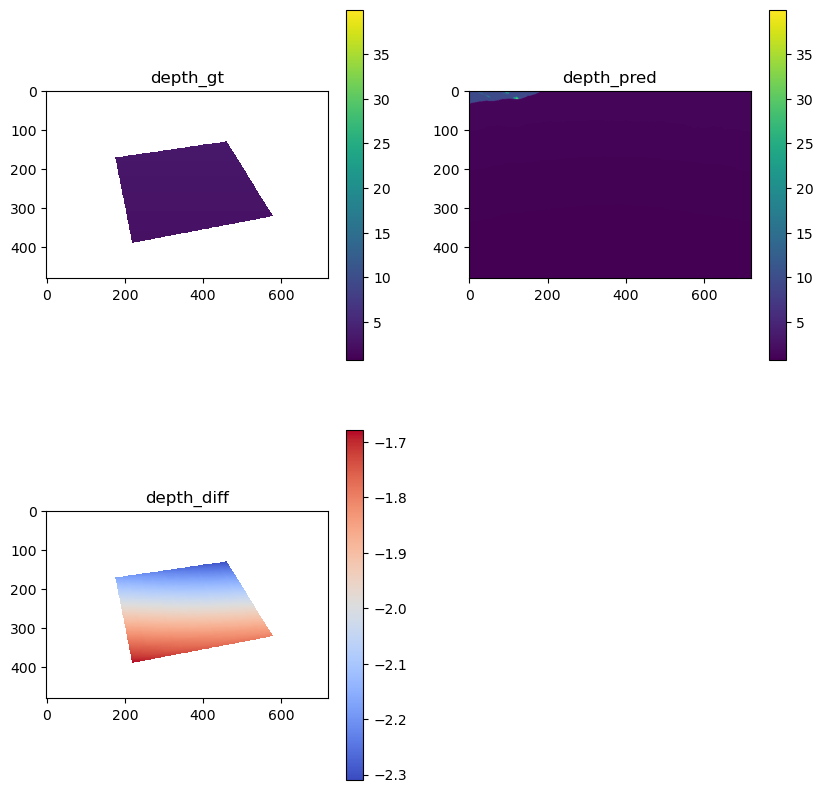

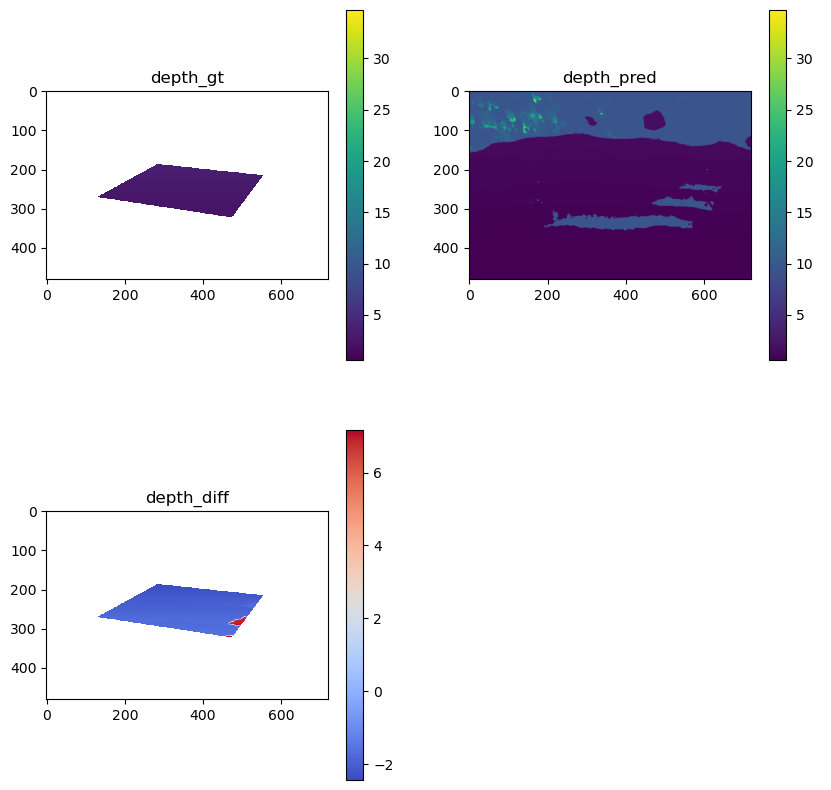

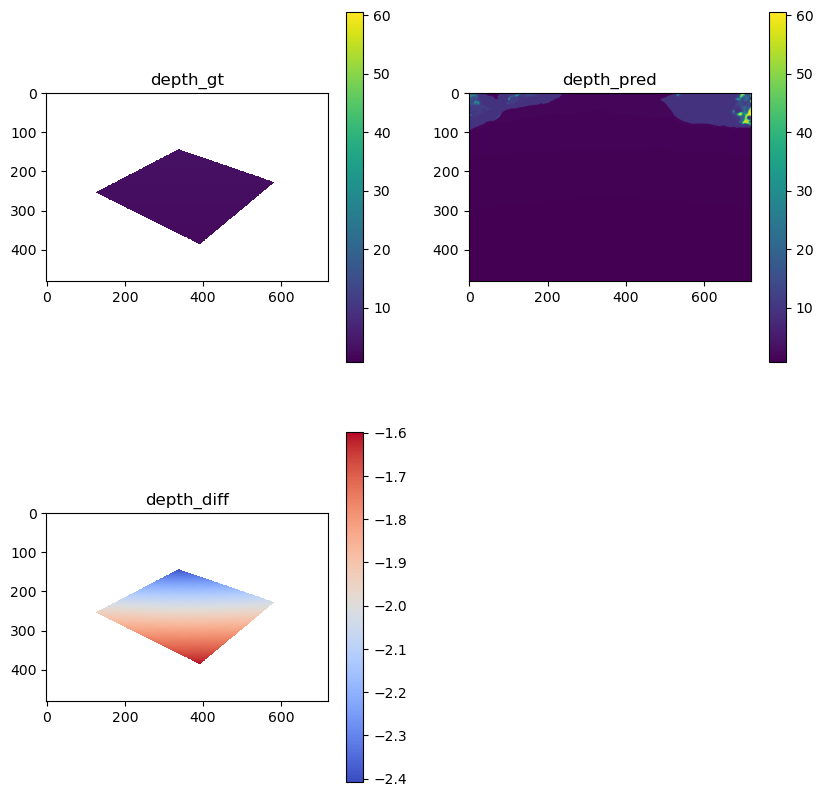

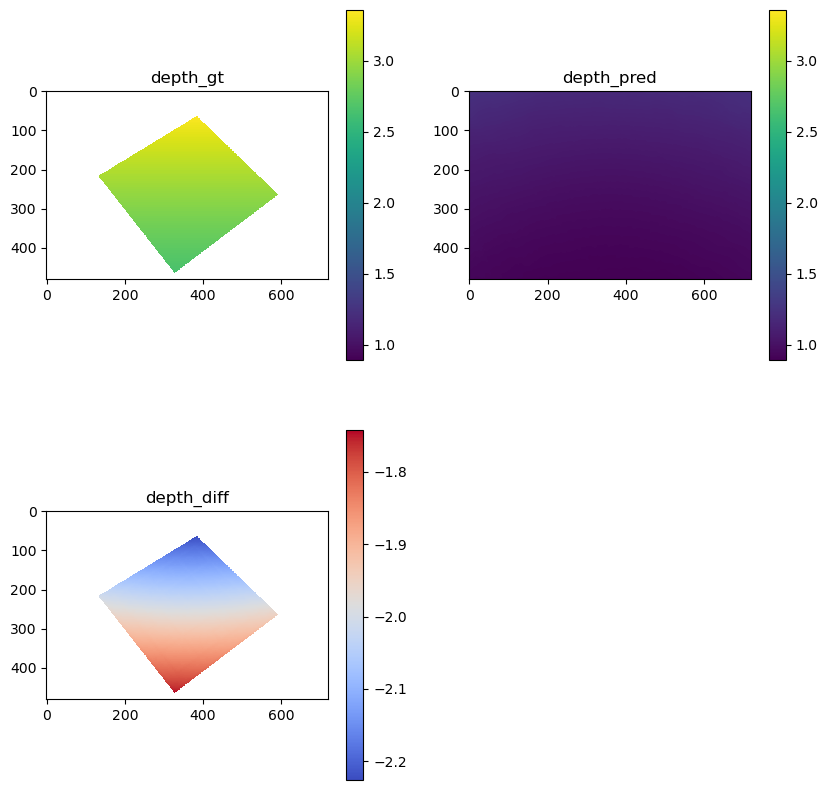

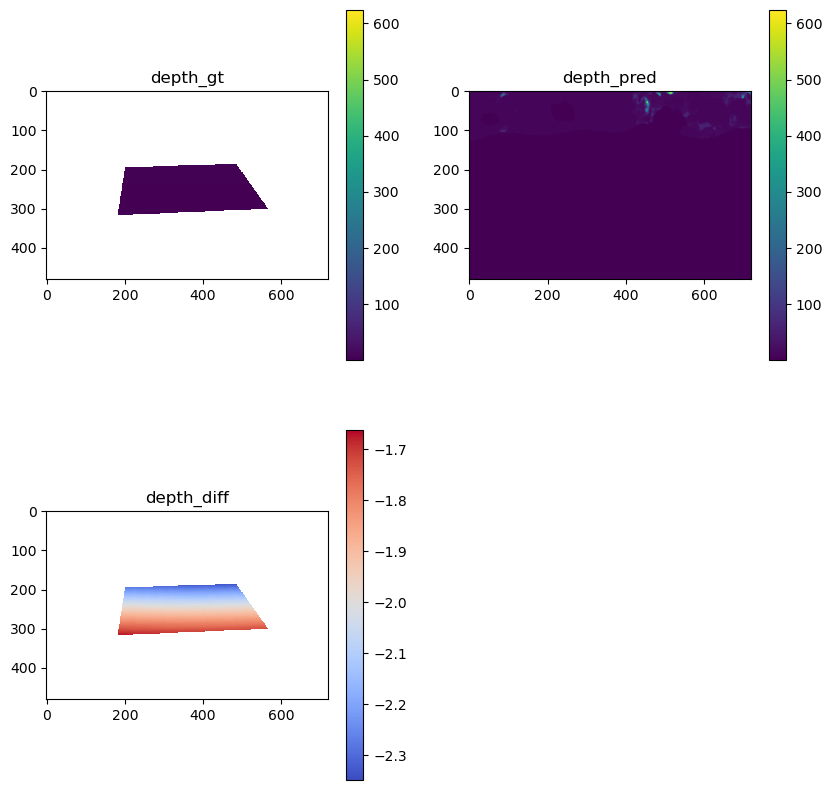

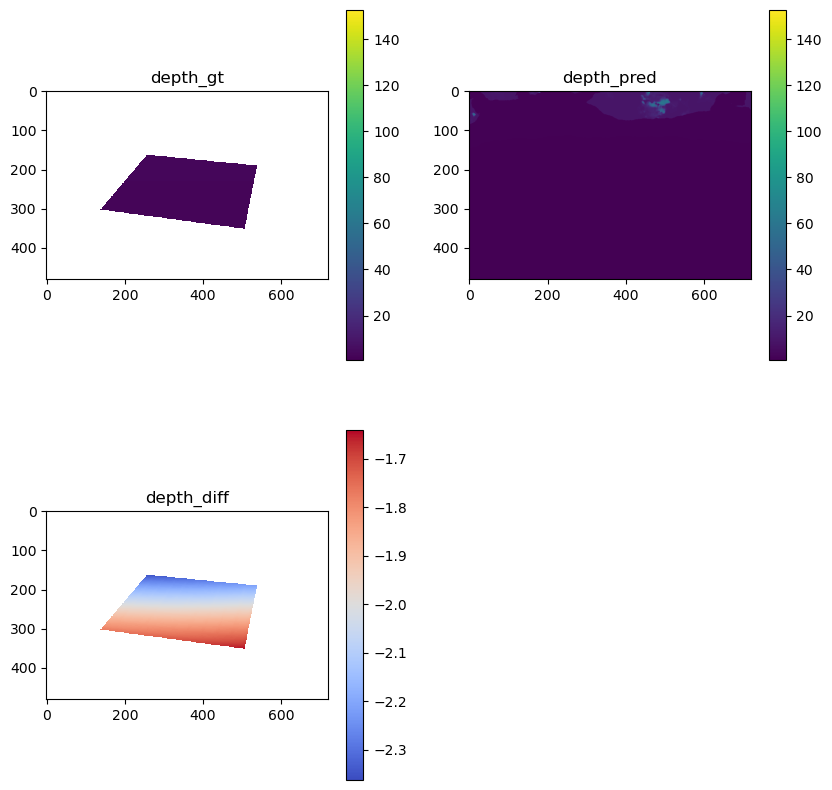

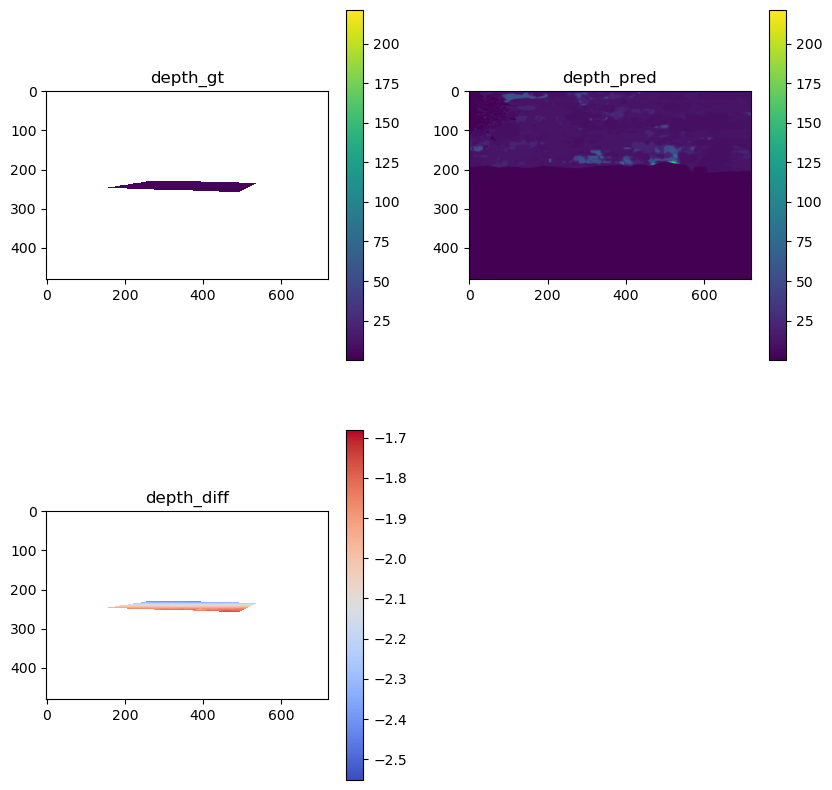

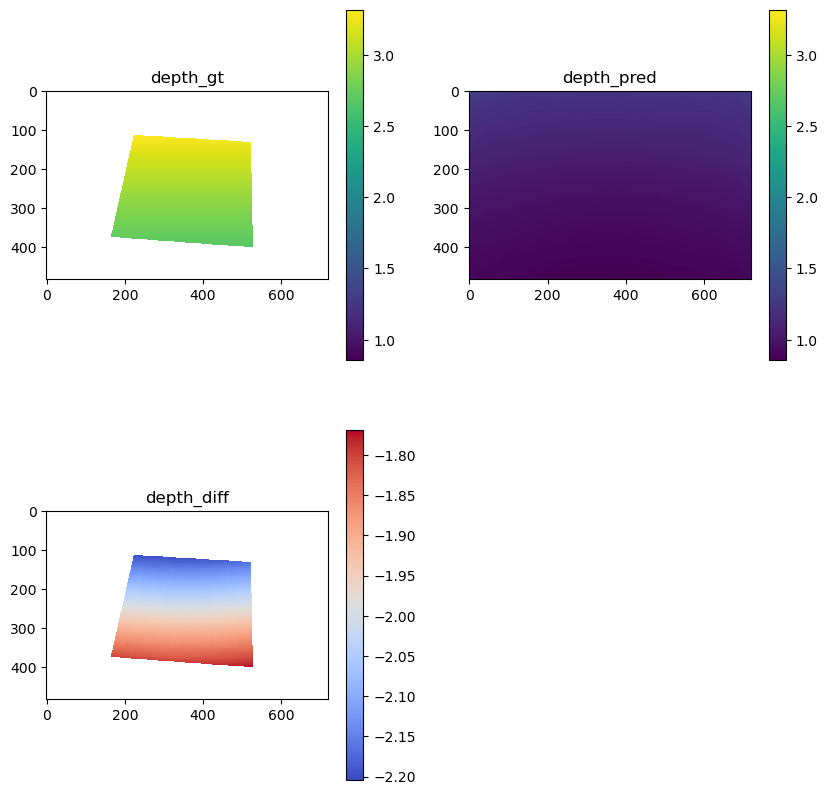

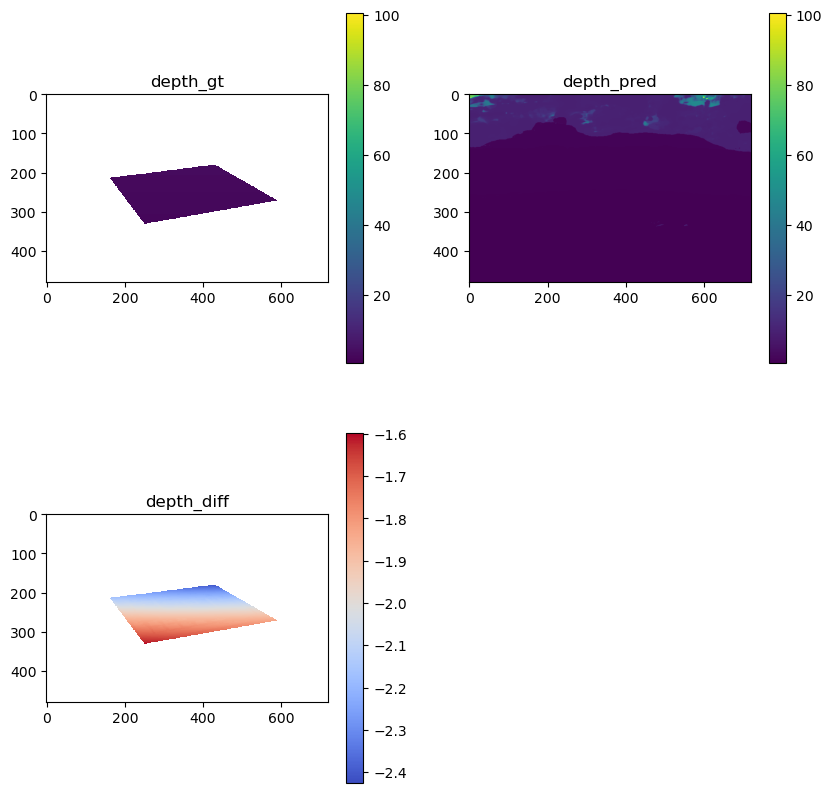

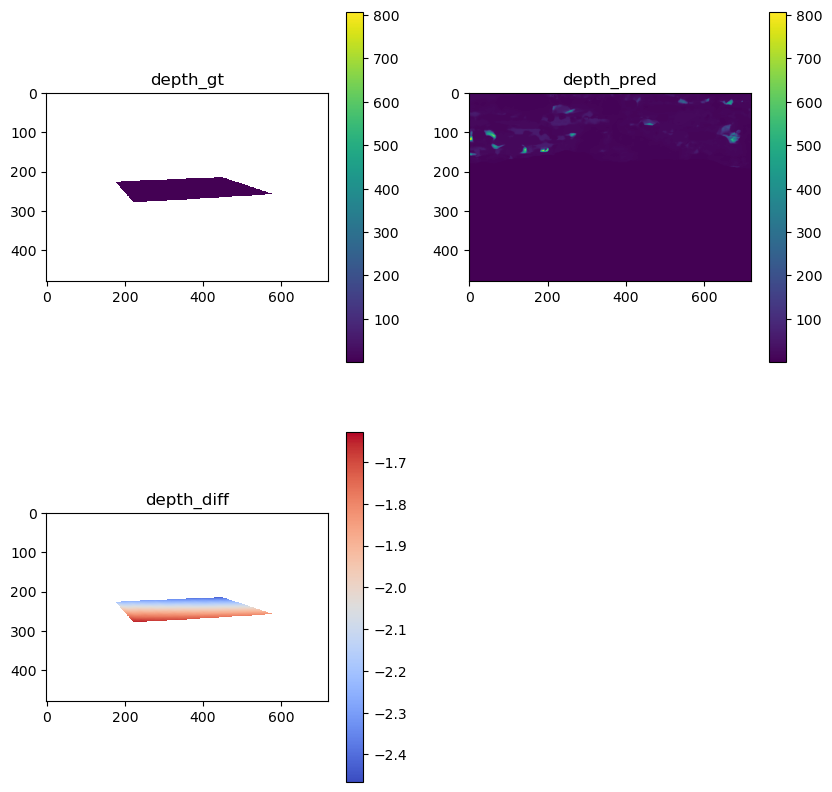

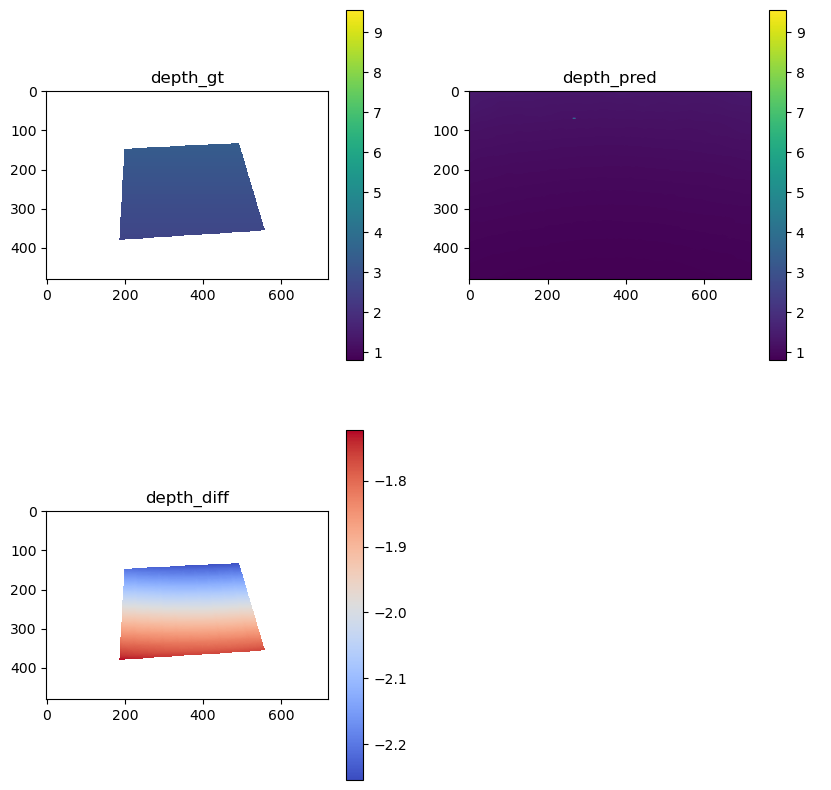

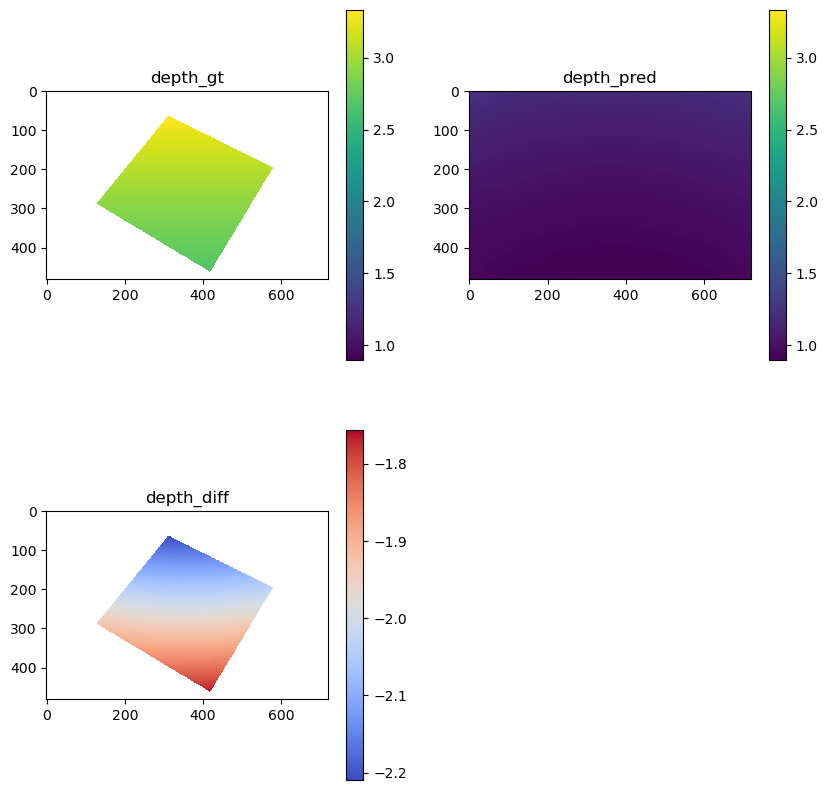

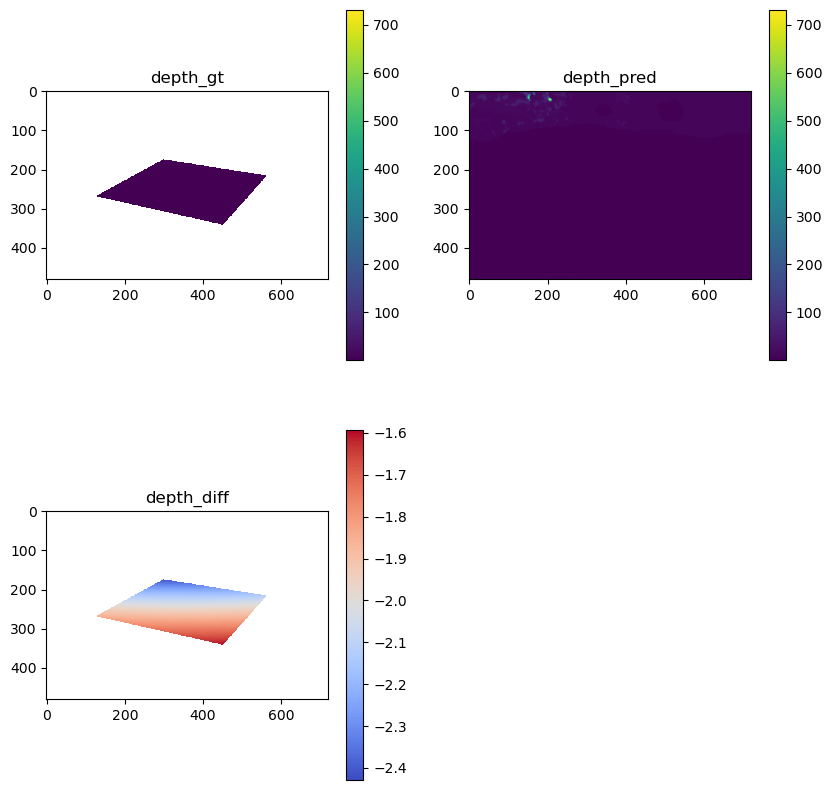

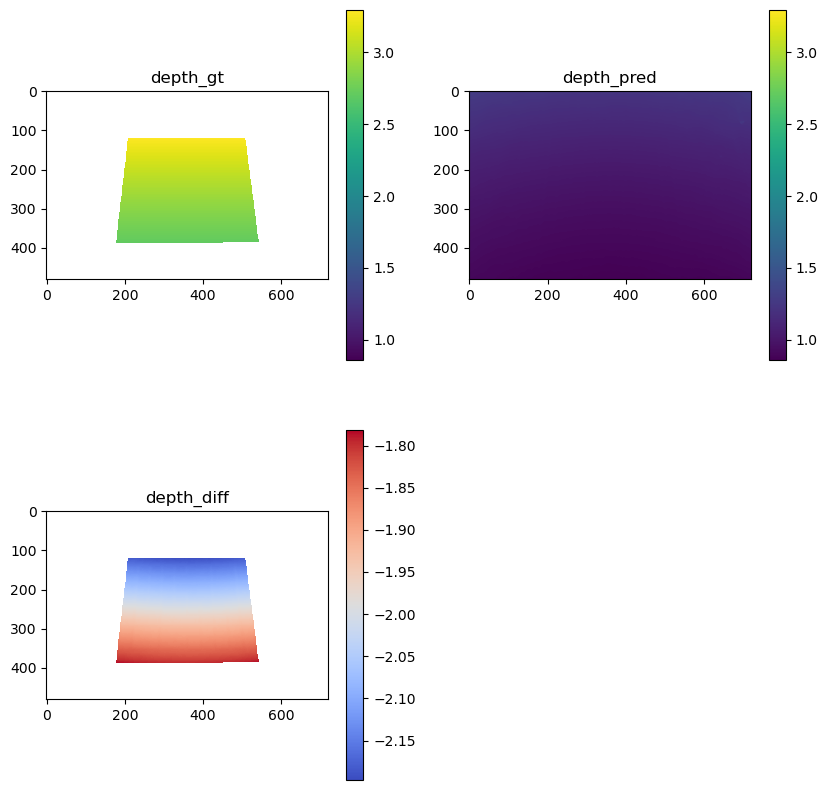

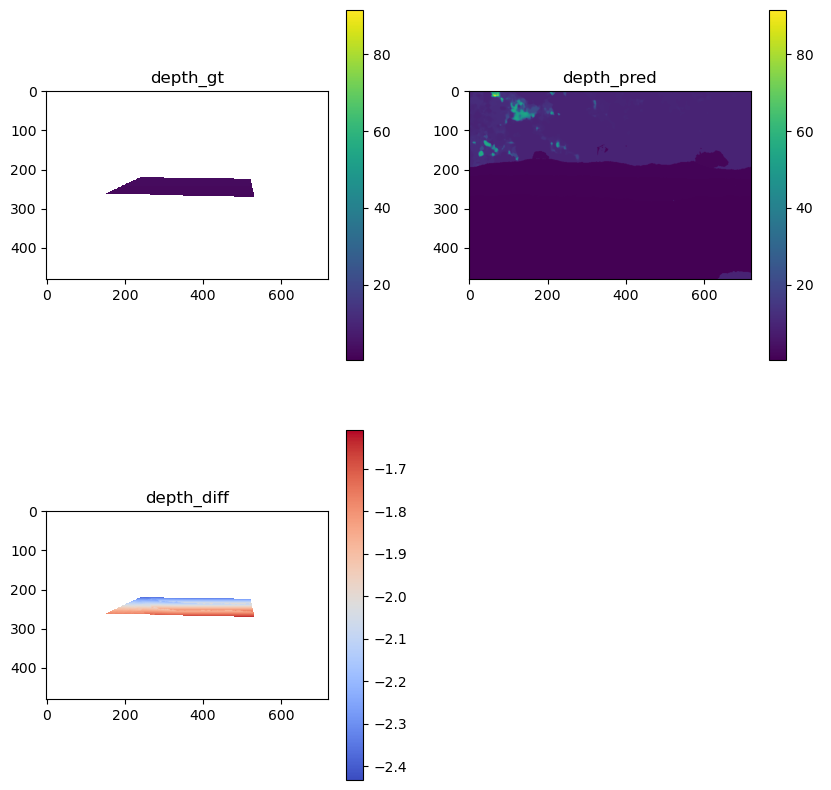

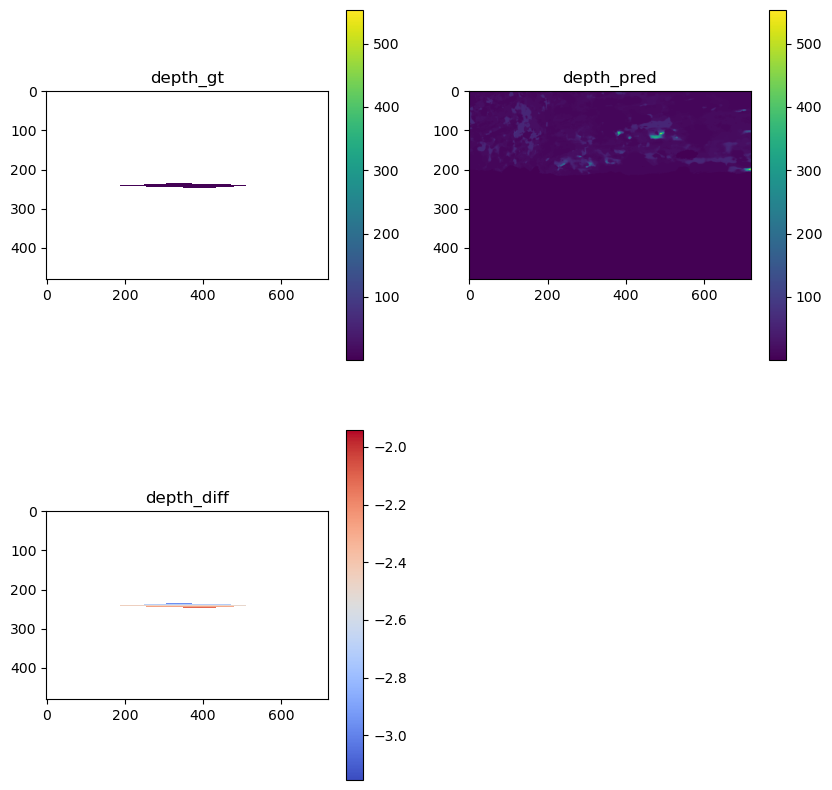

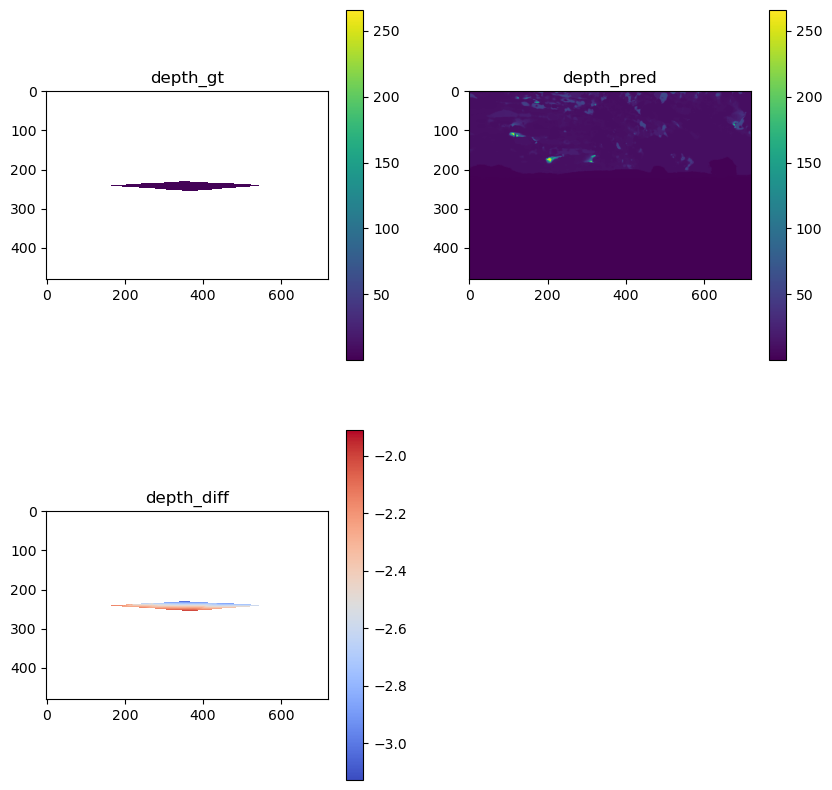

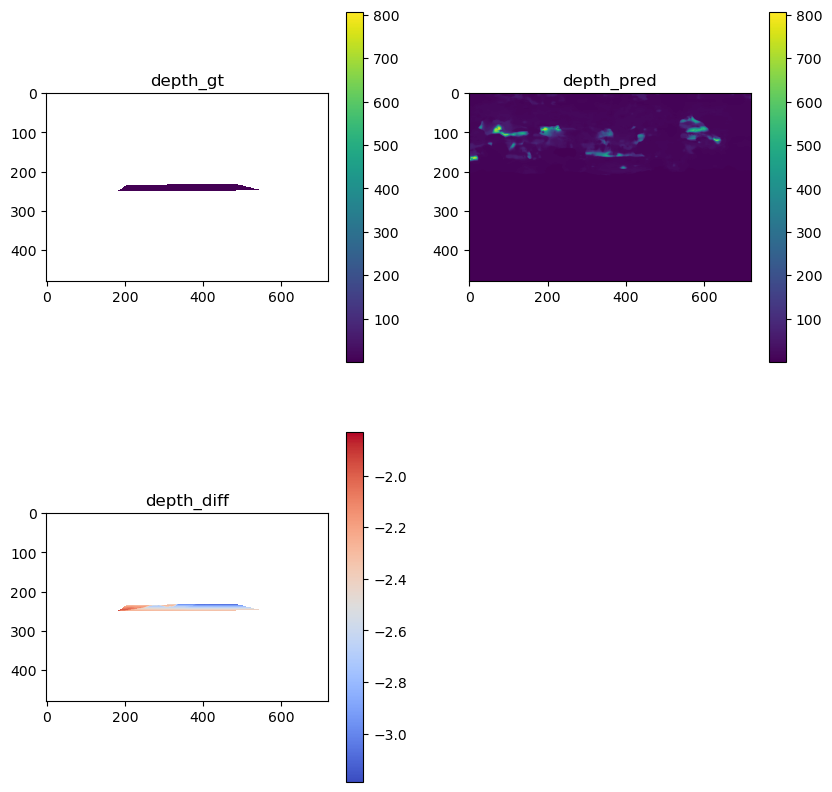

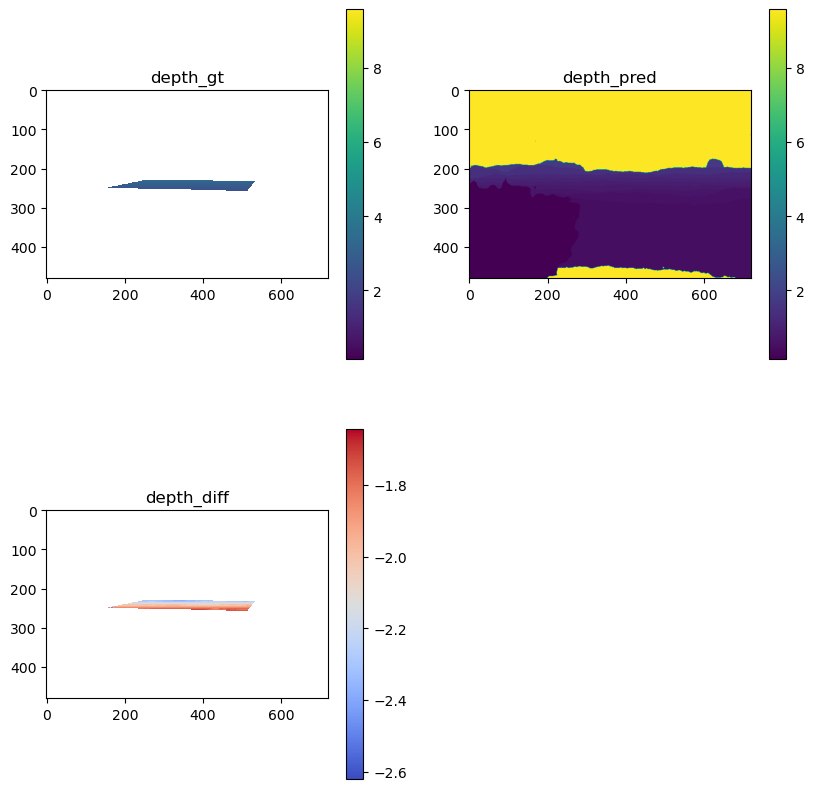

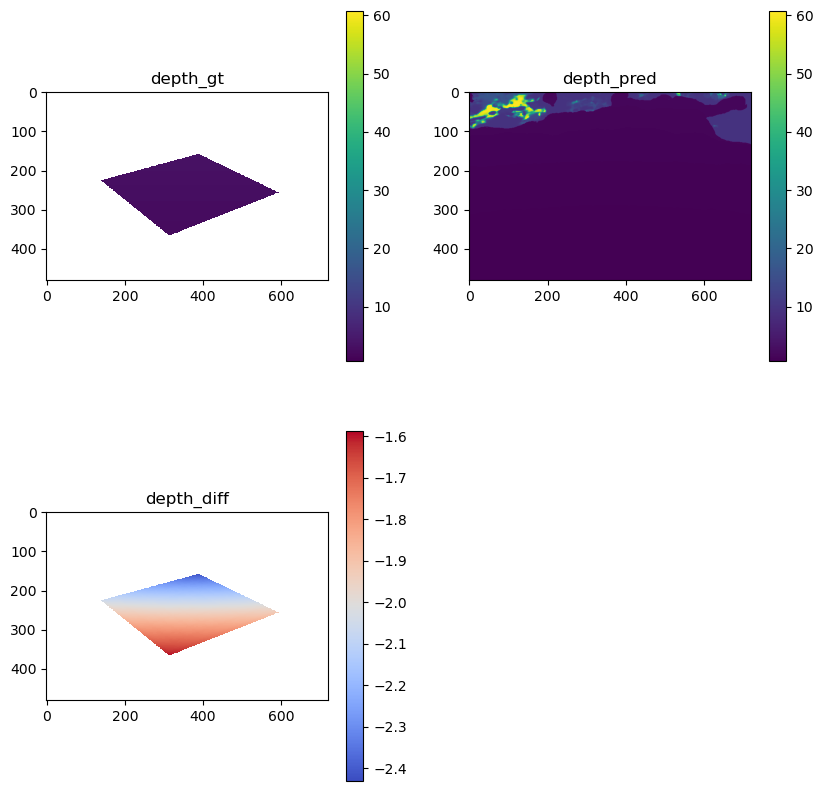

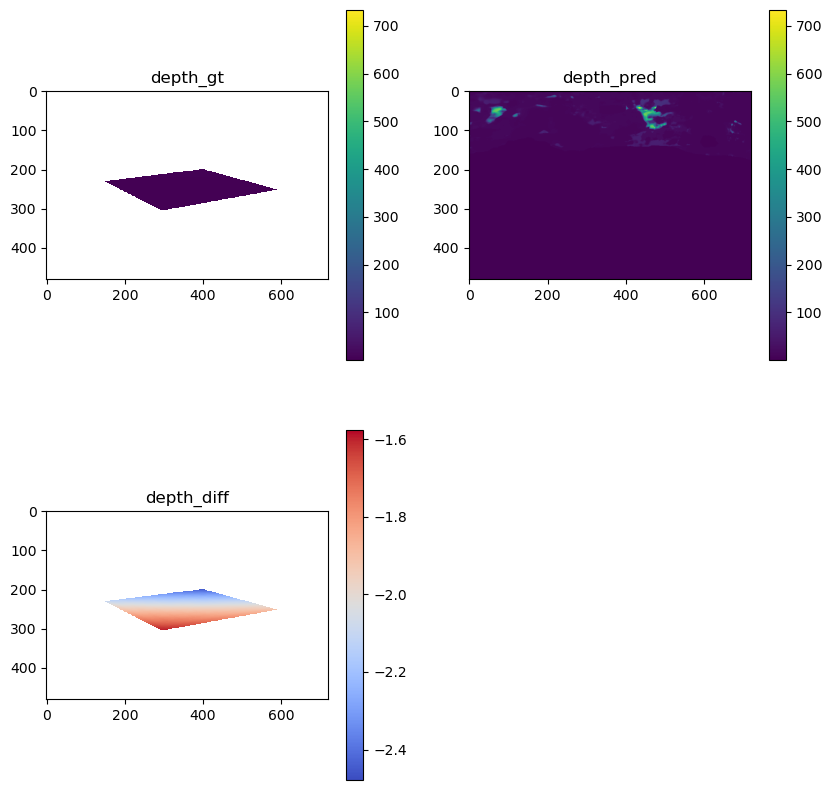

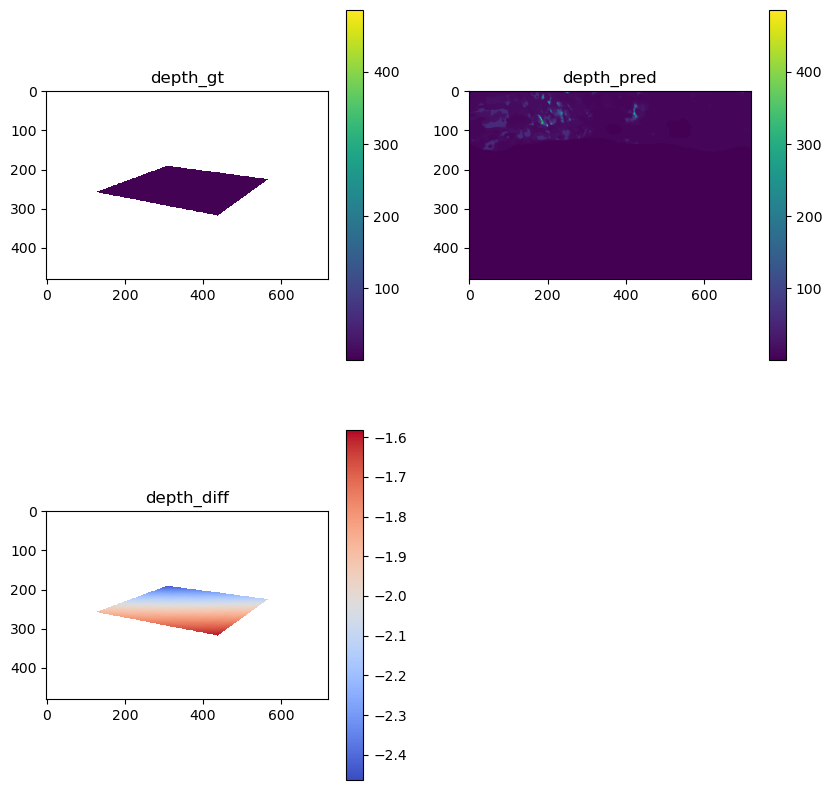

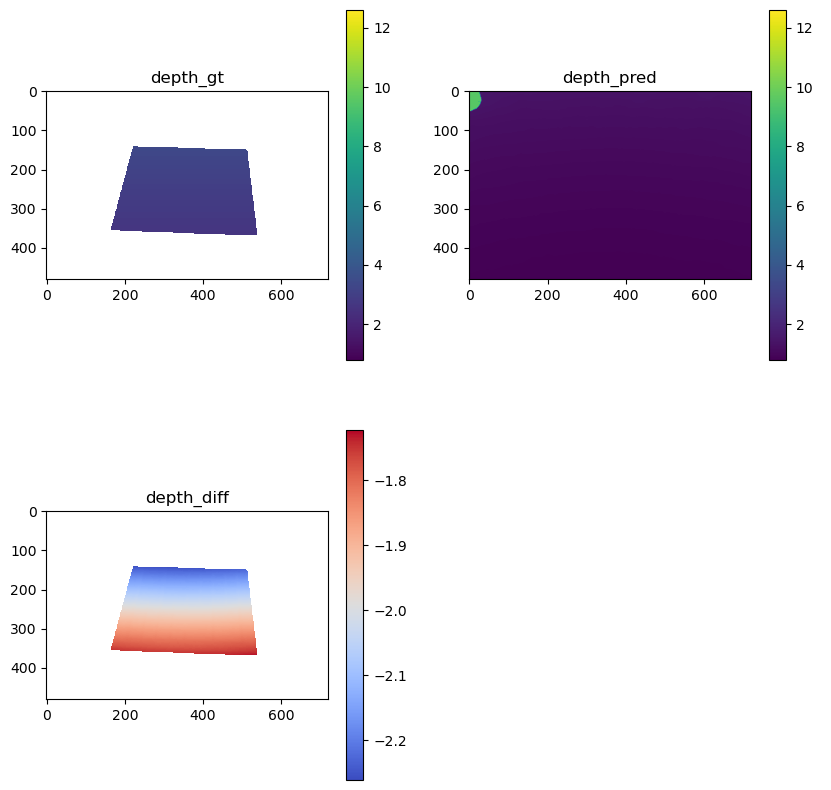

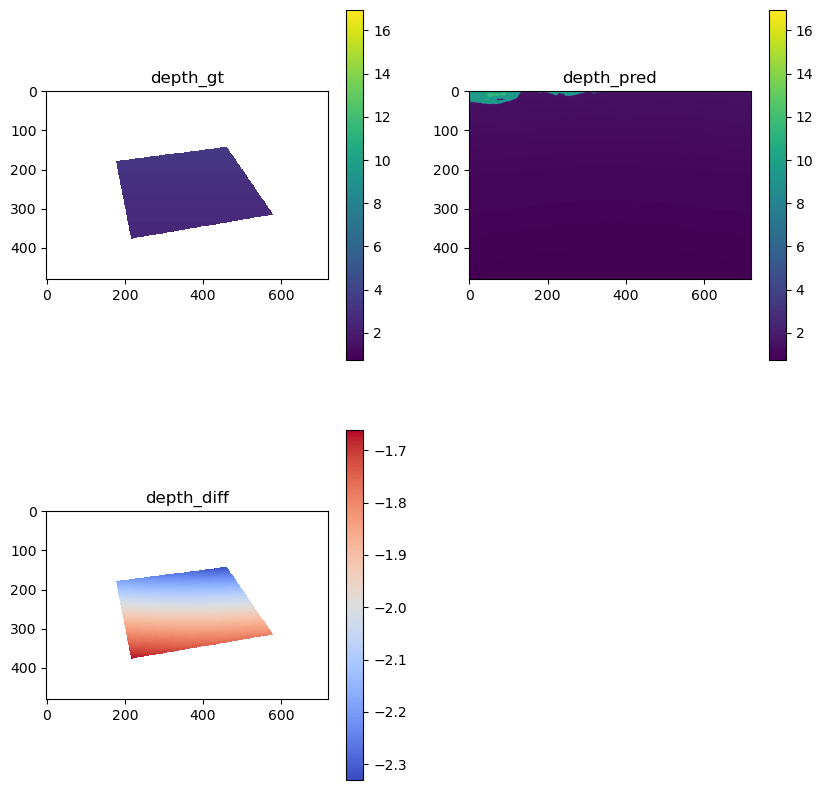

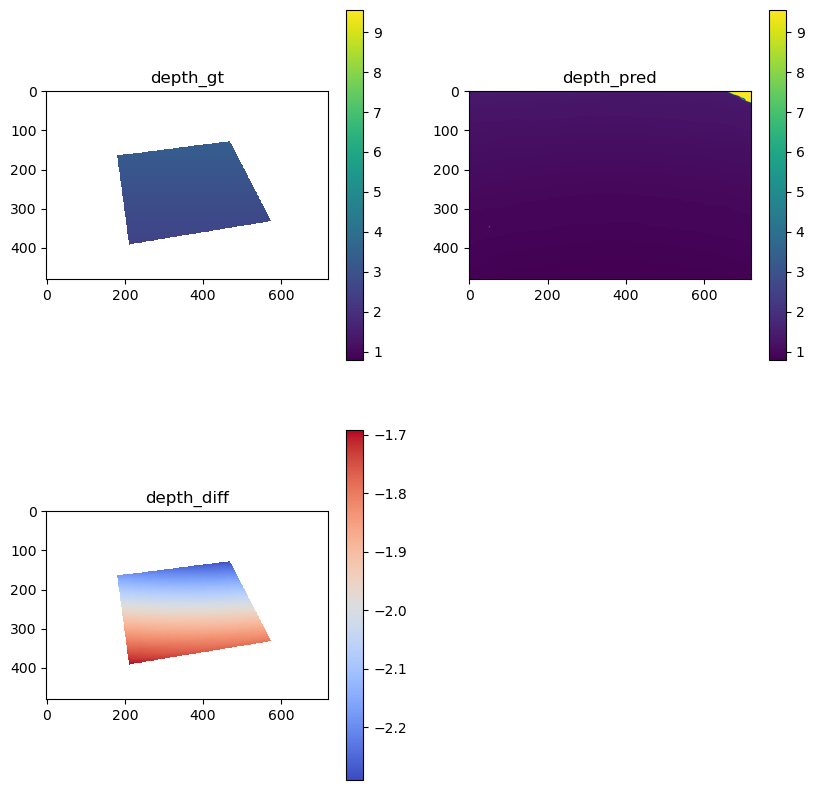

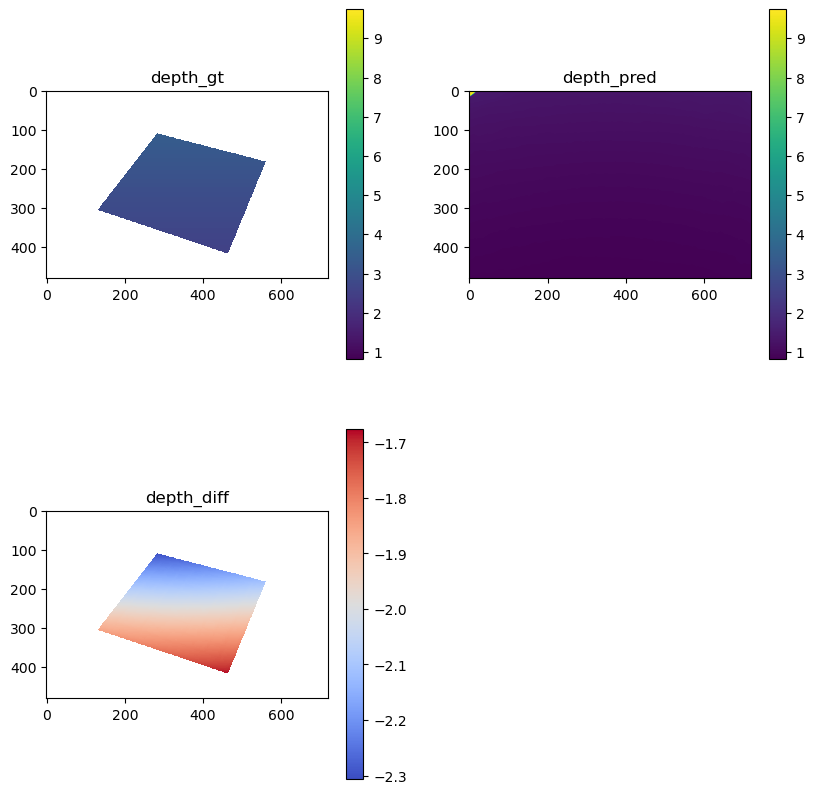

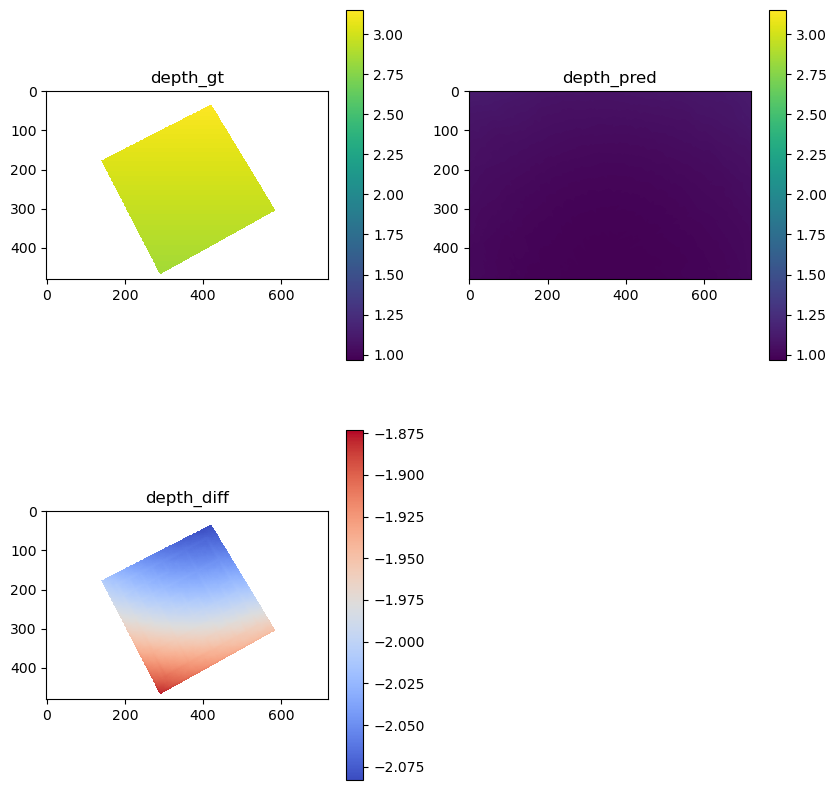

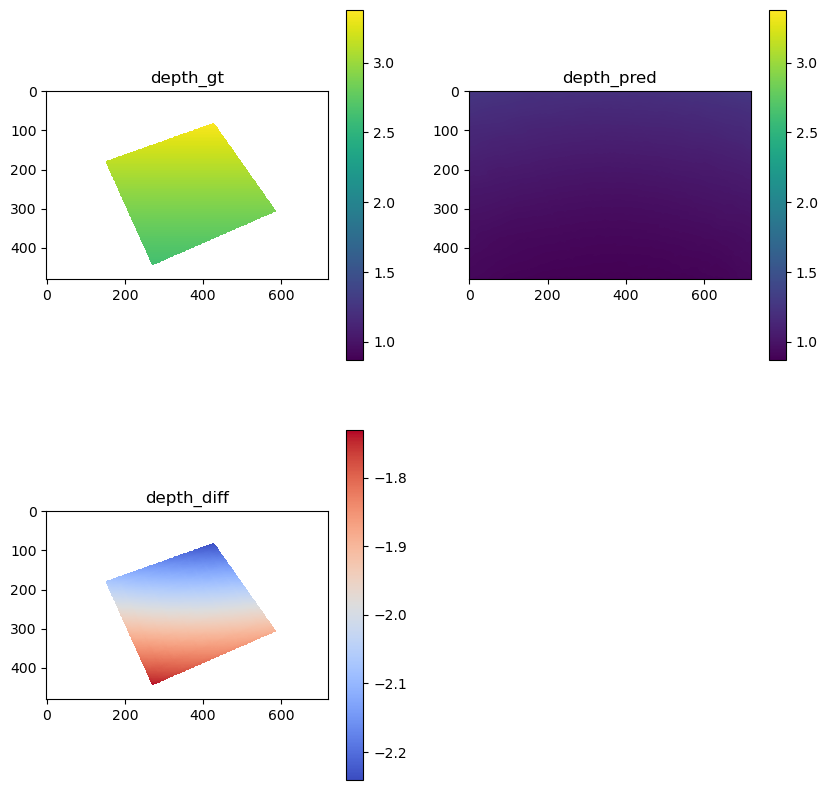

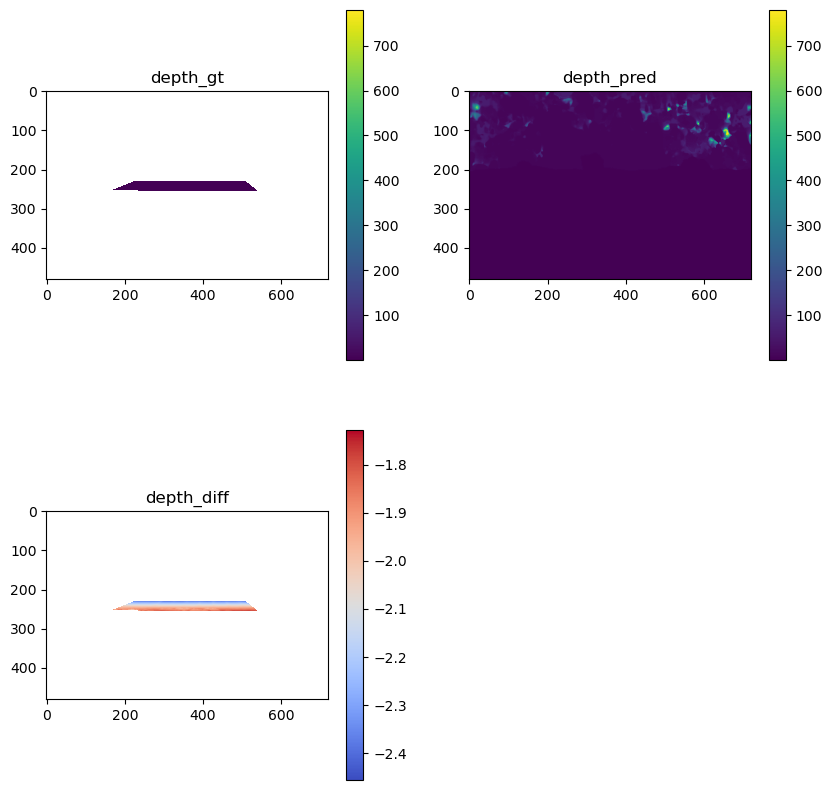

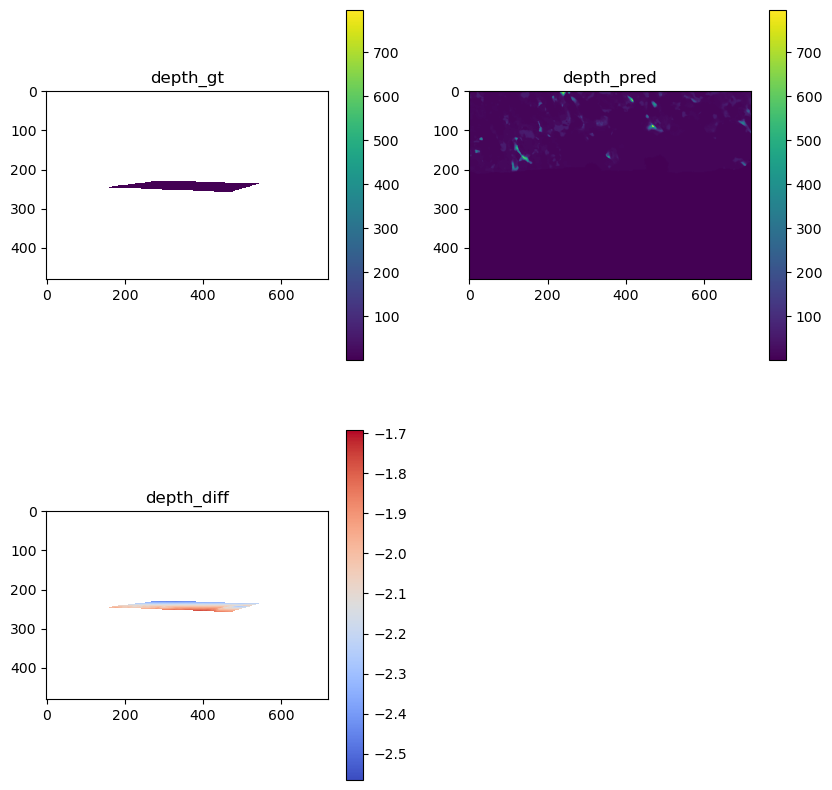

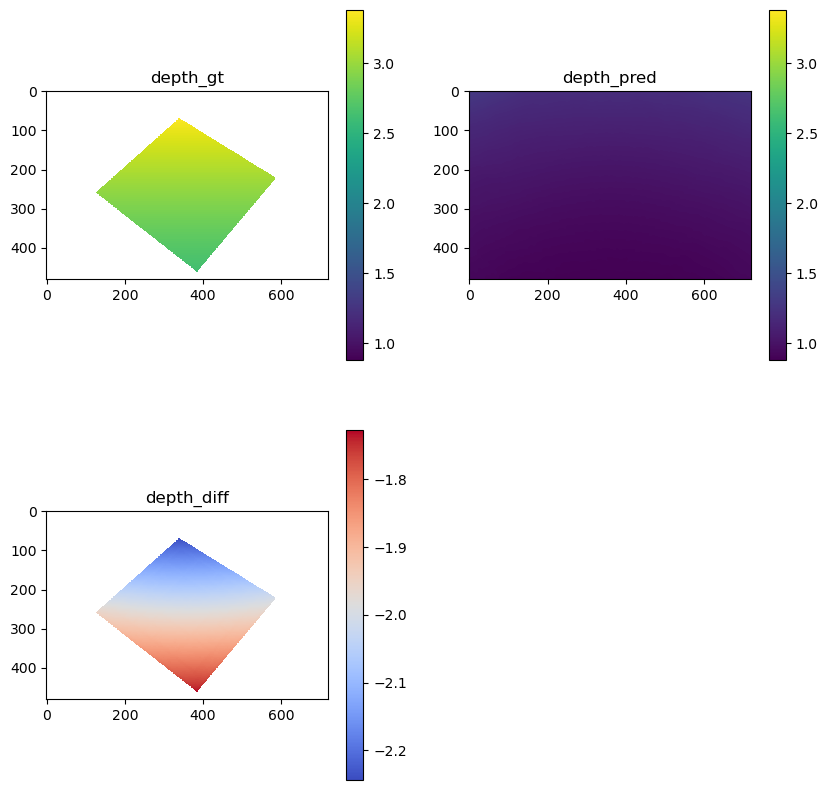

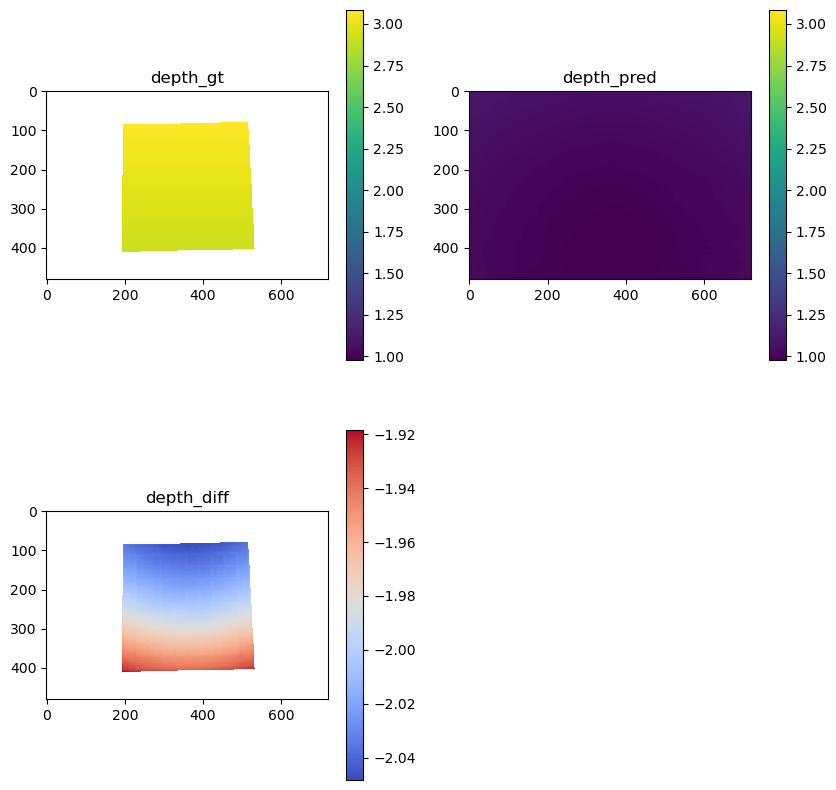

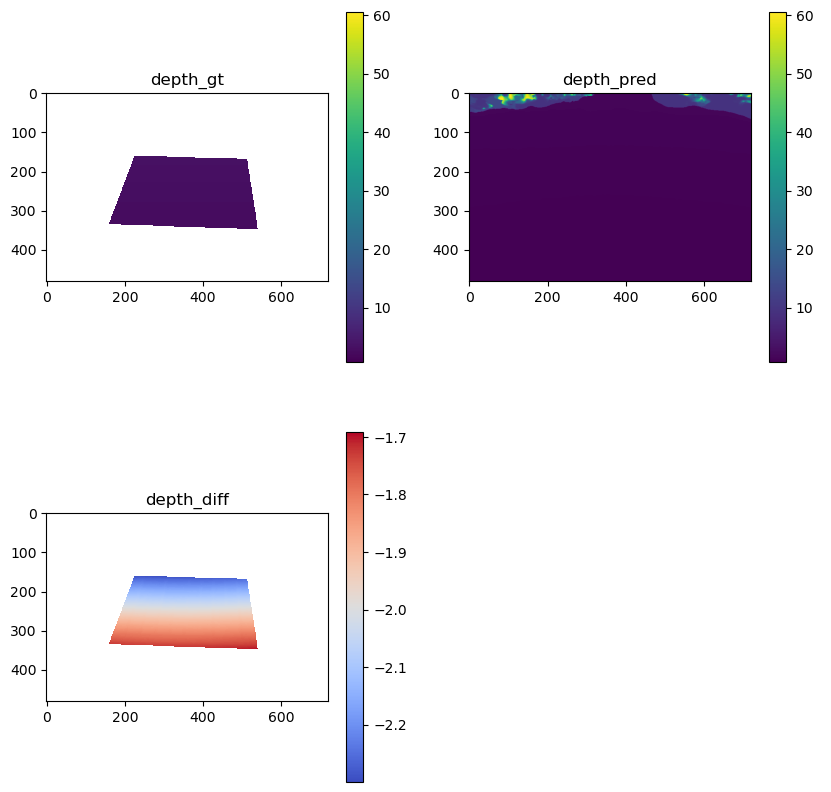

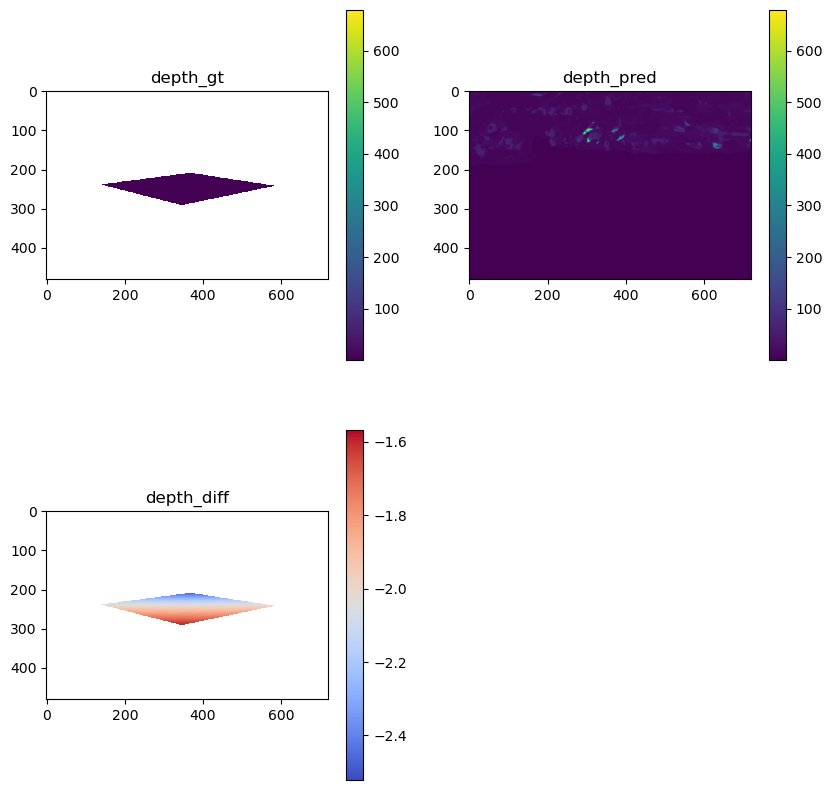

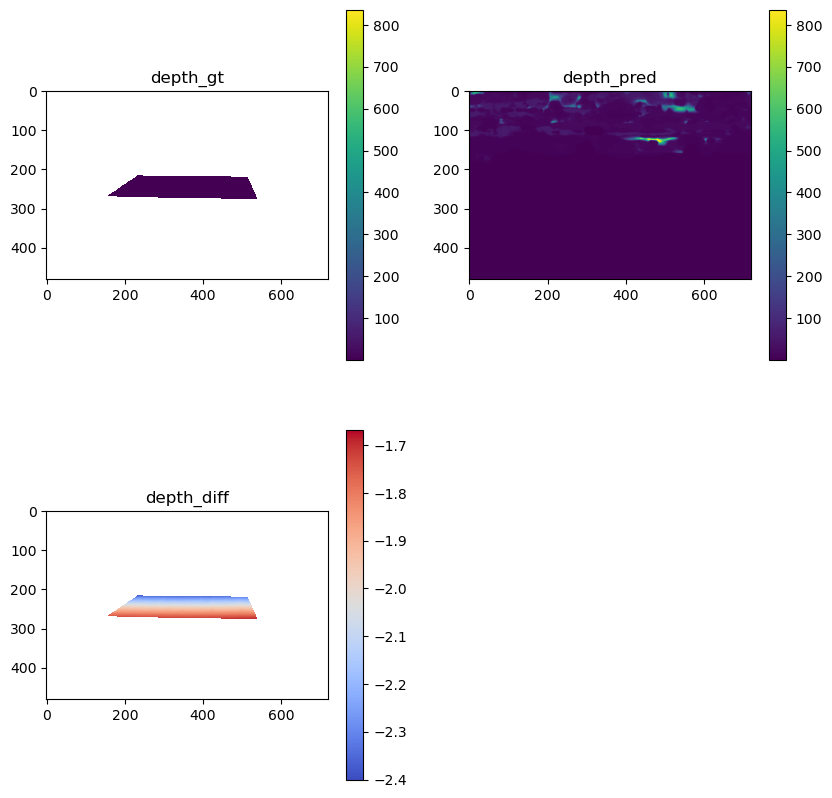

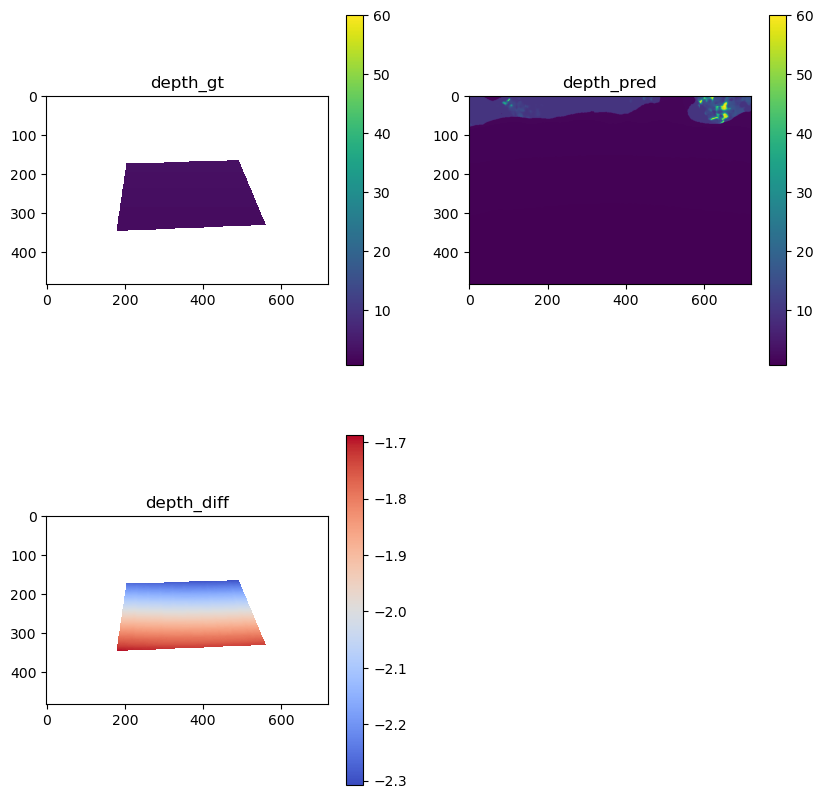

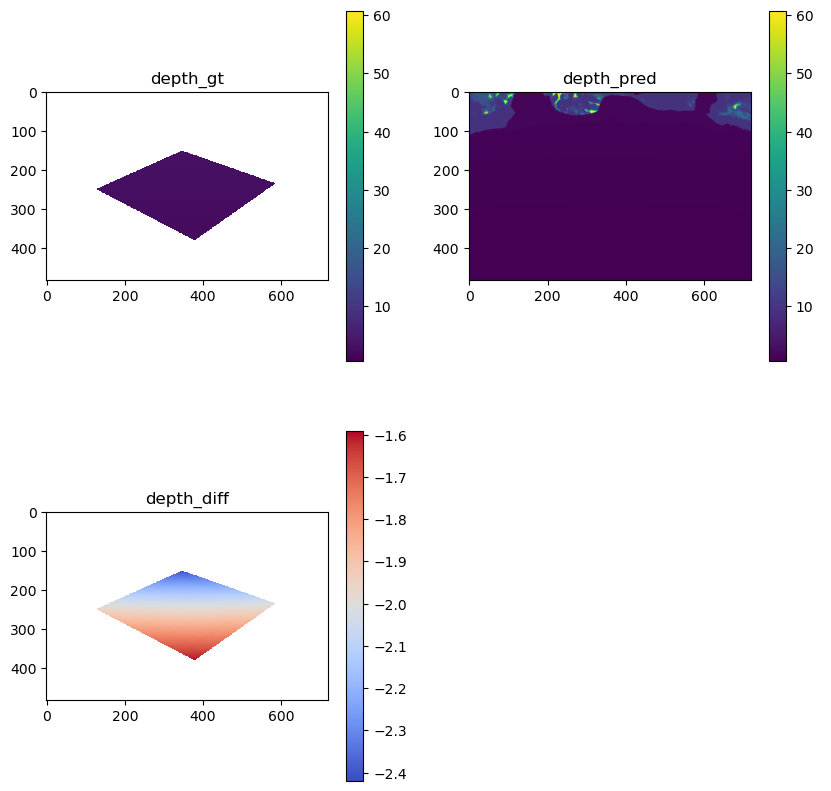

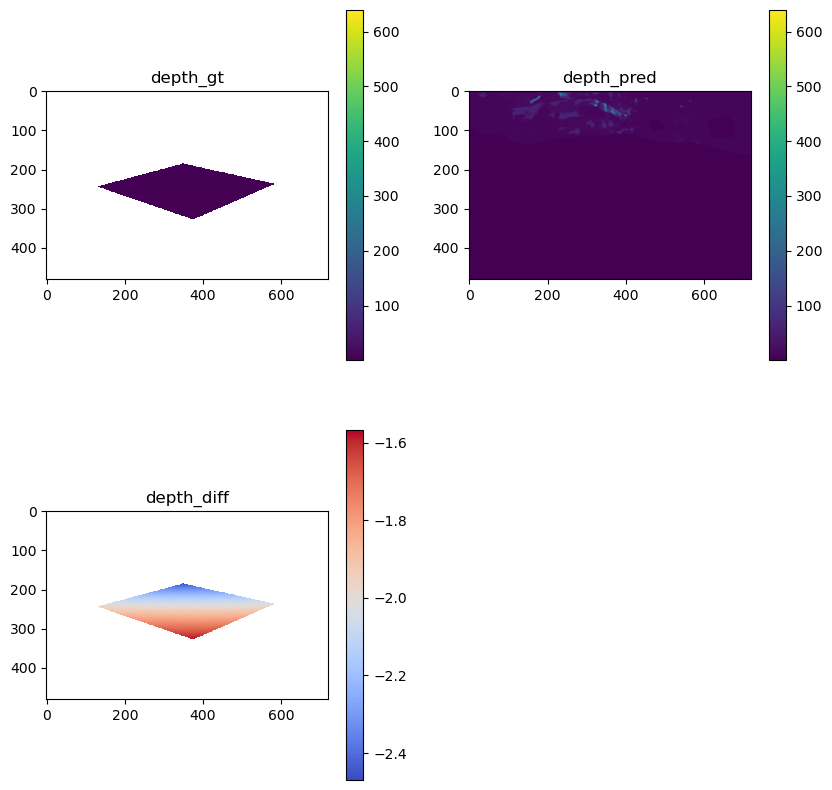

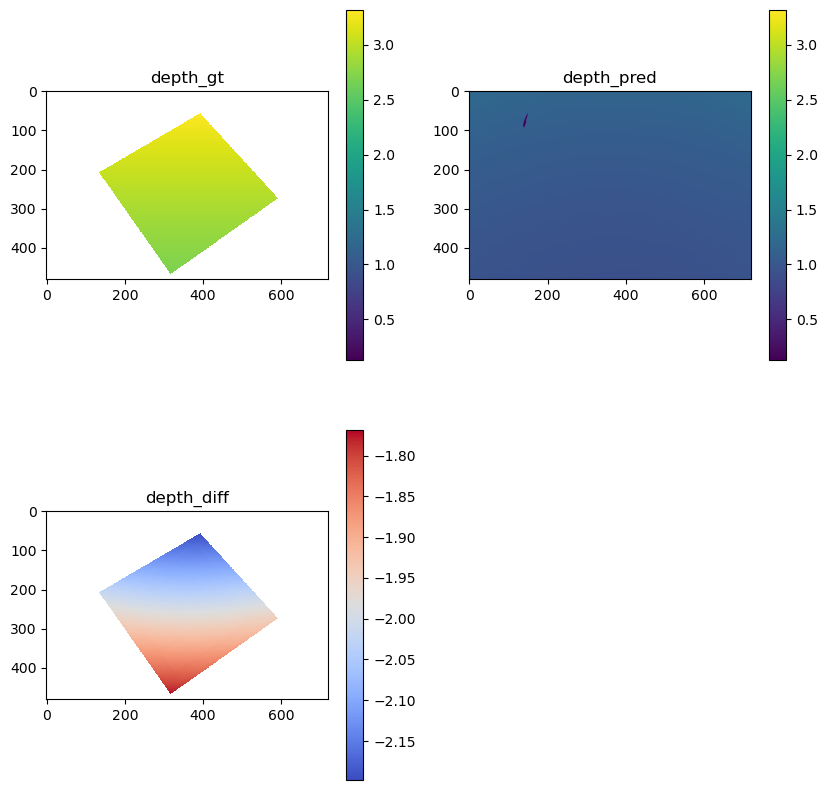

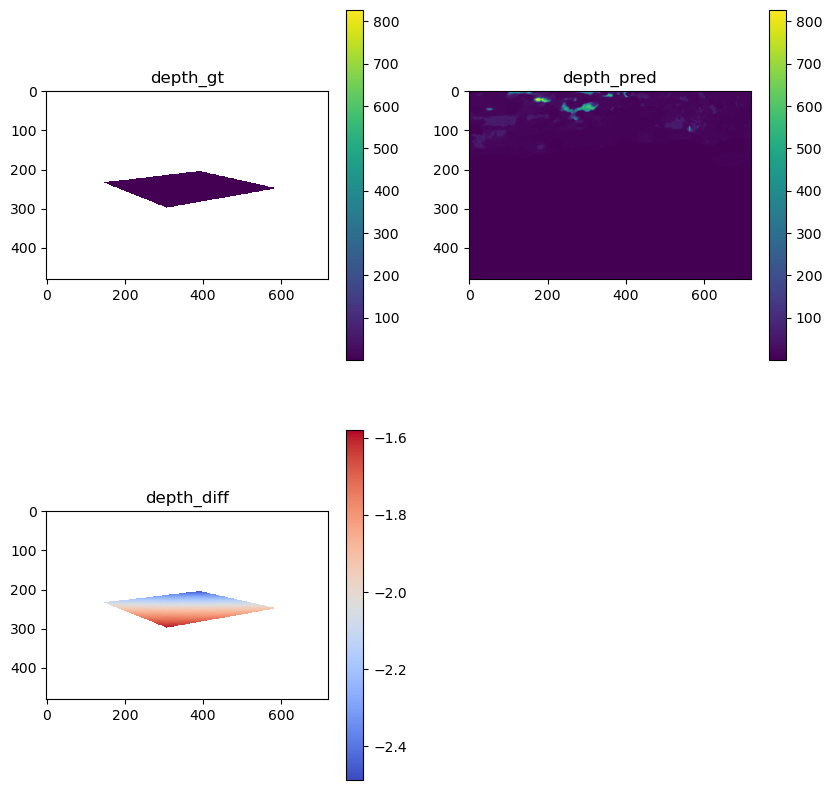

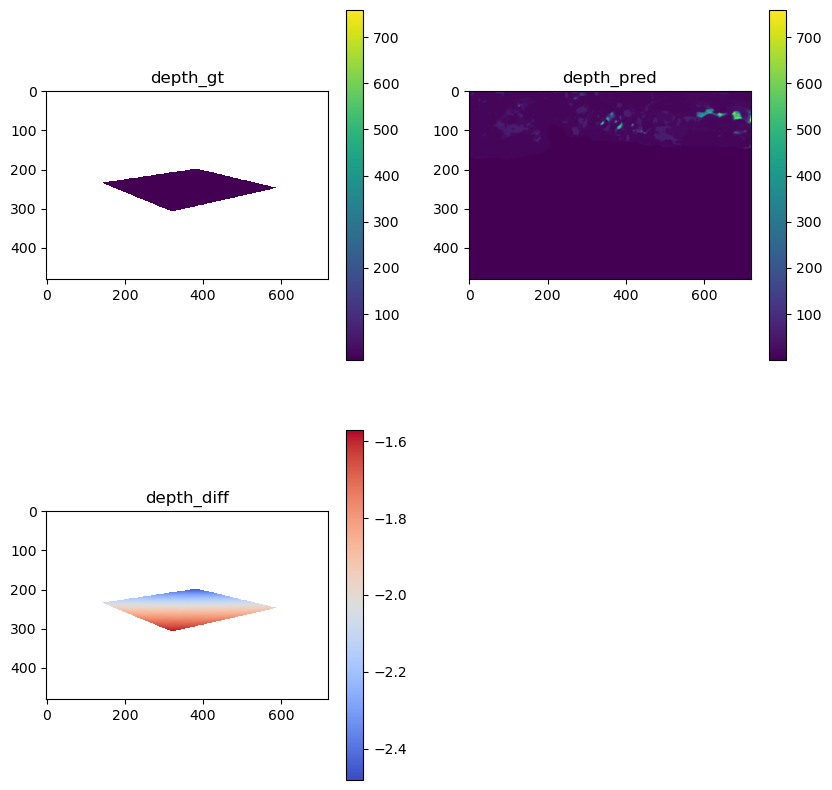

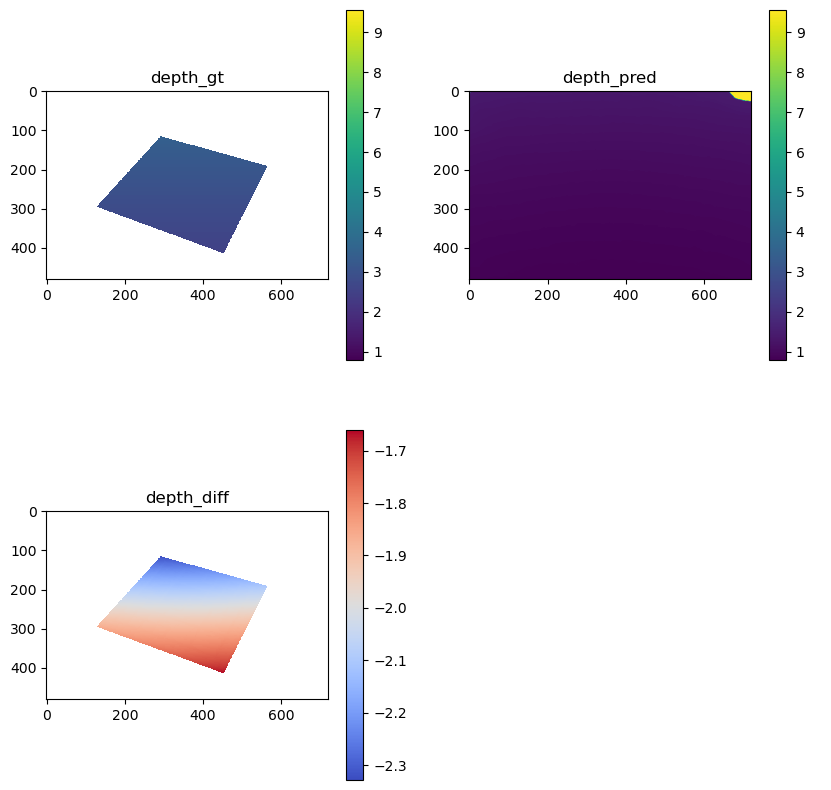

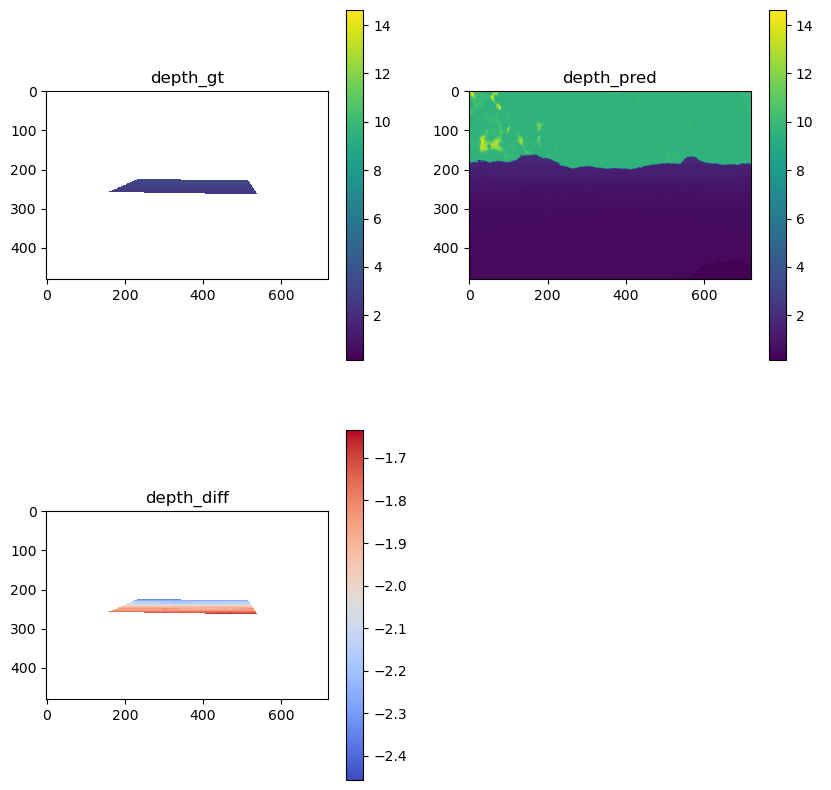

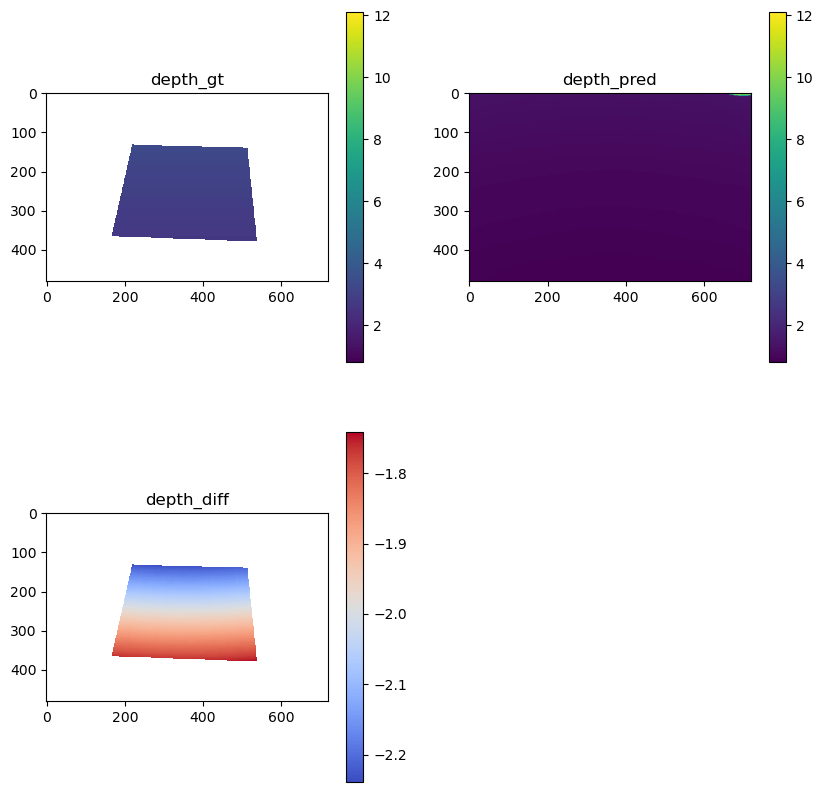

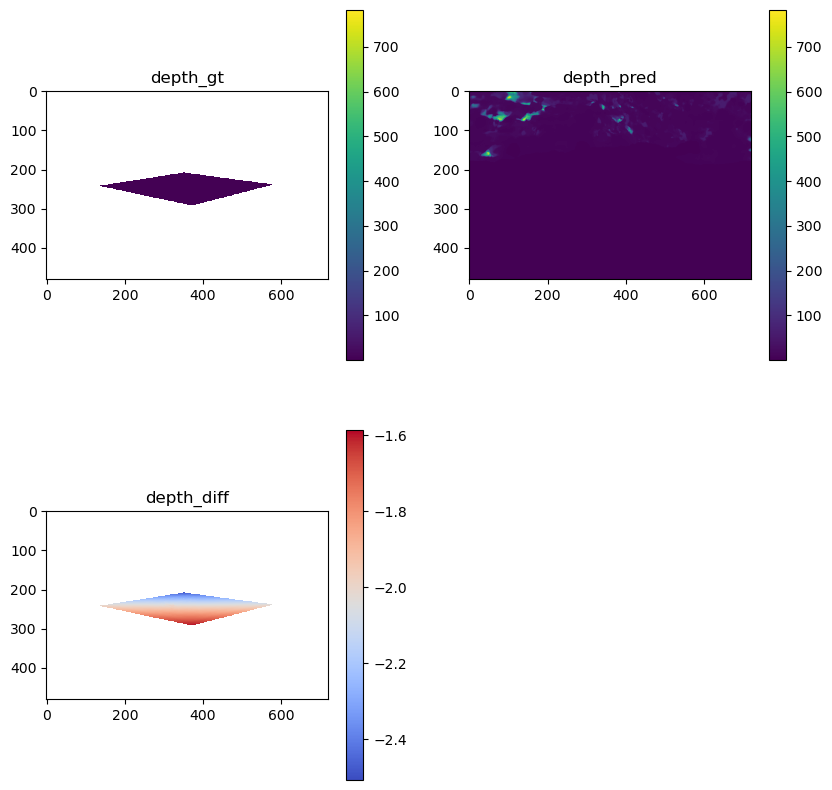

In [13]:
%matplotlib inline

depth_filenames = pipeline.datamanager.eval_dataset.metadata["depth_filenames"]

def read_depth_map(file_path):
    exr_file = OpenEXR.InputFile(file_path)
    dw = exr_file.header()['dataWindow']
    width = dw.max.x - dw.min.x + 1
    height = dw.max.y - dw.min.y + 1
    
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    depth_str = exr_file.channel('R', pt)
    depth = np.frombuffer(depth_str, dtype=np.float32)
    depth.shape = (height, width)  # reshape
    
    return torch.unsqueeze(torch.from_numpy(depth), dim=-1).to(device=device)

# from: https://github.com/kobejean/bts/blob/d4f1de8f9c8f253cc2bcd1ce0d92fce193a72bac/pytorch/bts_eval.py#L91-L112
def compute_errors(gt, pred):
    thresh = np.maximum((gt / pred), (pred / gt))
    d1 = (thresh < 1.25).mean()
    d2 = (thresh < 1.25 ** 2).mean()
    d3 = (thresh < 1.25 ** 3).mean()
    
    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())
    
    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())
    
    abs_rel = np.mean(np.abs(gt - pred) / gt)
    sq_rel = np.mean(((gt - pred) ** 2) / gt)
    
    err = np.log(pred) - np.log(gt)
    silog = np.sqrt(np.mean(err ** 2) - np.mean(err) ** 2) * 100
    
    err = np.abs(np.log10(pred) - np.log10(gt))
    log10 = np.mean(err)
    
    return silog, log10, abs_rel, sq_rel, rmse, rmse_log, d1, d2, d3

def save_depth_vis(file_path, depth_gt, depth_pred, depth_diff, mask):
    # Convert torch tensors to numpy arrays and apply mask
    depth_gt_np = depth_gt.to("cpu").numpy()
    depth_pred_np = depth_pred.to("cpu").numpy()
    depth_diff_np = depth_diff.to("cpu").numpy()

    mask_np = mask.to("cpu").numpy()

    depth_gt_masked = np.ma.masked_where(mask_np == 0, depth_gt_np)
    depth_pred_masked = depth_pred_np
    depth_diff_masked = np.ma.masked_where(mask_np == 0, depth_diff_np)
    # Find min and max depth values for a unified color scale
    vmin = min(np.min(depth_gt_masked), np.min(depth_pred_masked))
    vmax = max(np.max(depth_gt_masked), np.max(depth_pred_masked))

    # Create the subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # Plot the heatmaps
    cax1 = axs[0, 0].imshow(depth_gt_masked, cmap='viridis', vmin=vmin, vmax=vmax)
    axs[0, 0].set_title('depth_gt')
    fig.colorbar(cax1, ax=axs[0, 0])

    cax2 = axs[0, 1].imshow(depth_pred_masked, cmap='viridis', vmin=vmin, vmax=vmax)
    axs[0, 1].set_title('depth_pred')
    fig.colorbar(cax2, ax=axs[0, 1])

    cax3 = axs[1, 0].imshow(depth_diff_masked, cmap='coolwarm')
    axs[1, 0].set_title('depth_diff')
    fig.colorbar(cax3, ax=axs[1, 0])

    # Hide unused subplot
    axs[1, 1].axis('off')

    plt.savefig(file_path)


num_images = len(pipeline.datamanager.fixed_indices_eval_dataloader)
depth_silog = np.zeros(num_images, np.float32)
depth_log10 = np.zeros(num_images, np.float32)
depth_rms = np.zeros(num_images, np.float32)
depth_log_rms = np.zeros(num_images, np.float32)
depth_abs_rel = np.zeros(num_images, np.float32)
depth_sq_rel = np.zeros(num_images, np.float32)
depth_d1 = np.zeros(num_images, np.float32)
depth_d2 = np.zeros(num_images, np.float32)
depth_d3 = np.zeros(num_images, np.float32)

for camera_ray_bundle, batch in pipeline.datamanager.fixed_indices_eval_dataloader:
    image_idx = batch["image_idx"]
    depth_filepath = depth_filenames[image_idx]
    depth_gt = read_depth_map(str(depth_filepath))
    mask = depth_gt <= 1000
    depth_gt[depth_gt > 1000] = torch.min(depth_gt[mask])
    outputs = pipeline.model.get_outputs_for_camera_ray_bundle(camera_ray_bundle)

    rgb_pred = outputs["rgb"].cpu()
    rgb_pred = torch.concat([rgb_pred, torch.ones((rgb_pred.shape[0], rgb_pred.shape[1], 1))], dim=-1)
    rgb_gt = batch["image"].cpu()
    print(rgb_gt.shape, rgb_pred.shape)
    rgb_compare = torch.concat([rgb_gt, rgb_pred], dim=1)
    acc = outputs["accumulation"]
    acc_vis = colormaps.apply_colormap(acc)

    depth_pred = outputs["depth"]

    depth_pred_vis = colormaps.apply_depth_colormap(
        depth_pred,
        accumulation=outputs["accumulation"],
    )
    depth_gt_vis = colormaps.apply_depth_colormap(
        depth_gt,
    )
    depth_gt_vis = torch.concat([depth_gt_vis, mask], dim=-1)
    depth_diff = depth_pred - depth_gt
    depth_diff[depth_gt > 1000] = torch.min(depth_diff[mask])
    depth_diff_vis = colormaps.apply_depth_colormap(
        depth_diff,
    )
    depth_diff_vis = torch.concat([depth_diff_vis, mask], dim=-1)

    save_as_image(rgb_pred, render_output_path / f"rgb_pred_{image_idx:04d}.png")
    save_as_image(rgb_gt, render_output_path / f"rgb_gt_{image_idx:04d}.png")
    save_as_image(rgb_compare, render_output_path / f"rgb_compare_{image_idx:04d}.png")
    save_as_image(acc_vis, render_output_path / f"acc_{image_idx:04d}.png")
    save_as_image(depth_pred_vis, render_output_path / f"depth_pred_{image_idx:04d}.png")
    save_as_image(depth_gt_vis, render_output_path / f"depth_gt_{image_idx:04d}.png")
    save_as_image(depth_diff_vis, render_output_path / f"depth_diff_{image_idx:04d}.png")
    save_depth_vis(render_output_path / f"depth_plot_{image_idx:04d}.png", depth_gt, depth_pred, depth_diff, mask)

    depth_silog[image_idx], depth_log10[image_idx], depth_abs_rel[image_idx], depth_sq_rel[image_idx], depth_rms[image_idx], depth_log_rms[image_idx], depth_d1[image_idx], depth_d2[image_idx], depth_d3[image_idx] = compute_errors(
            depth_gt[mask].to("cpu").numpy(), depth_pred[mask].to("cpu").numpy())
    
    

/home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343998658/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


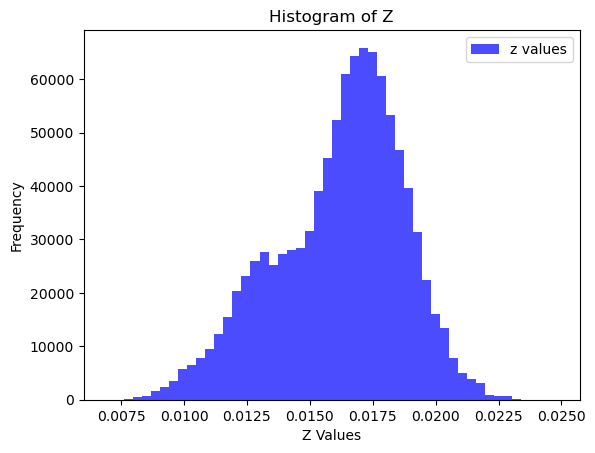

646

In [14]:
%matplotlib inline

# load data for coverting between original and normalized coodinate space
dataparser_transforms_path = config.get_base_dir() / "dataparser_transforms.json"
dataparser_transforms_data = json.load(open(dataparser_transforms_path))
dataparser_scale = dataparser_transforms_data["scale"]
transform = torch.tensor(dataparser_transforms_data["transform"])

sampling_width = 0.5
camera_ray_bundle = plane_eval_ray_bundle(dataparser_transforms_data, sampling_width, dimensions=plane_dimensions).to(device)
outputs = pipeline.model.get_outputs_for_camera_ray_bundle(camera_ray_bundle)

rgb = outputs["rgb"]
depth = outputs["depth"]
mask = depth < 2 * sampling_width
mask = torch.abs(depth - torch.mean(depth)) < 1 * torch.std(depth)
acc = colormaps.apply_colormap(outputs["accumulation"])
depth_vis = torch.clone(depth)
depth_vis[torch.logical_not(mask)] = torch.min(depth[mask])
depth_vis = colormaps.apply_depth_colormap(
    depth_vis,
    accumulation=outputs["accumulation"],
)
depth_vis = torch.concat([depth_vis, mask], dim=-1)

z = sampling_width - (outputs["depth"] / dataparser_scale)
z_vis = torch.clone(z)
z_vis[torch.logical_not(mask)] = torch.min(z[mask])
z_vis = colormaps.apply_depth_colormap(
    z_vis,
    accumulation=outputs["accumulation"],
)
z_vis = torch.concat([z_vis, mask], dim=-1)

save_as_image(rgb, render_output_path / "rgb.png")
save_as_image(acc, render_output_path / "acc.png")
save_as_image(depth_vis, render_output_path / "depth.png")
save_as_image(z_vis, render_output_path / "z.png")
torch.save(z_vis, render_output_path / "z.pt")

fig = plt.figure()
plt.hist(z.cpu().numpy().flatten(), bins=50, color='blue', alpha=0.7, label='z values')
plt.xlabel('Z Values')
plt.ylabel('Frequency')
plt.title('Histogram of Z')
plt.legend()
plt.savefig(render_output_path / 'z_hist.jpeg')
plt.show()

# Get the output and define the names to save to
benchmark_info = {
    "experiment_name": config.experiment_name,
    "method_name": config.method_name,
    "checkpoint": str(checkpoint_path),
    "results": {
        "max_z": float(torch.max(z)),
        "min_z": float(torch.min(z)),
        "std_z": float(torch.std(z)),
        "mean_z": float(torch.mean(z)),
        "depth_metrics": {
            "silog": float(depth_silog.mean()),
            "log10": float(depth_log10.mean()),
            "abs_rel": float(depth_abs_rel.mean()),
            "sq_rel": float(depth_sq_rel.mean()),
            "rms": float(depth_rms.mean()),
            "log_rms": float(depth_log_rms.mean()),
            "d1": float(depth_d1.mean()),
            "d2": float(depth_d2.mean()),
            "d3": float(depth_d3.mean()),
        }
    },
}
# Save output to output file
results_path.write_text(json.dumps(benchmark_info, indent=2), "utf8")

(1001, 1001)


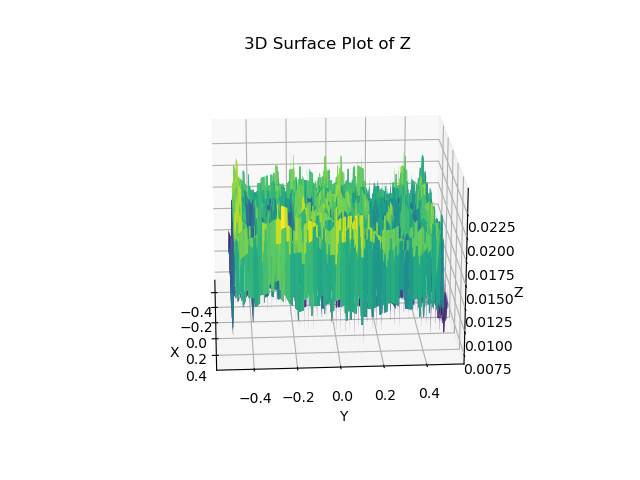

No such comm: 087ccd631a084354be6558a7a1134a4f


In [15]:
%matplotlib widget
from matplotlib.animation import FuncAnimation

# Convert PyTorch tensor to NumPy array
z_numpy = z.squeeze().cpu().numpy()
print(z_numpy.shape)

# Create x and y coordinates for 1x1 xy-plane centered at origin
x = np.linspace(-0.5, 0.5, 1001)
y = np.linspace(-0.5, 0.5, 1001)
x, y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z_numpy, cmap='viridis')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot of Z')

# Function to update the plot at each frame
def update(frame):
    ax.view_init(elev=20., azim=3.6*frame)
    return surface,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), blit=False, repeat=False)

# To save the animation
ani.save(render_output_path / '3D_rotation.gif', writer='imagemagick')


# # Show plot
# plt.show()



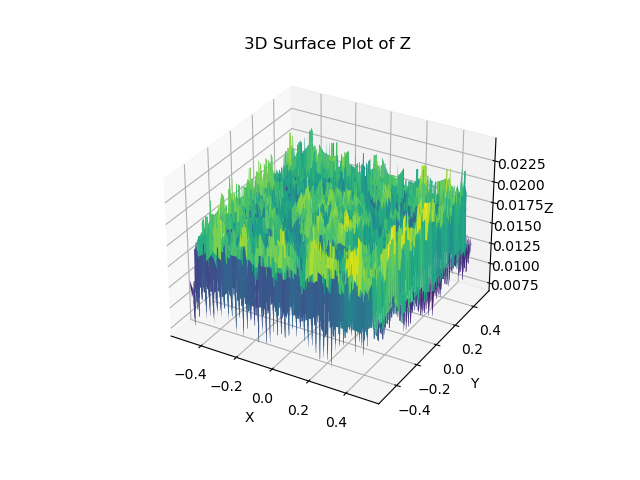

No such comm: e0c9e6808dd94336873c9ef5dded8198


In [16]:
%matplotlib widget

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z_numpy, cmap='viridis')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot of Z')


# # Show plot
plt.show()



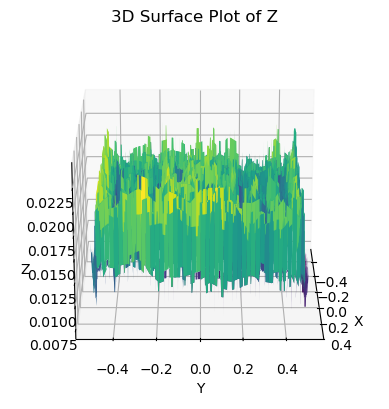

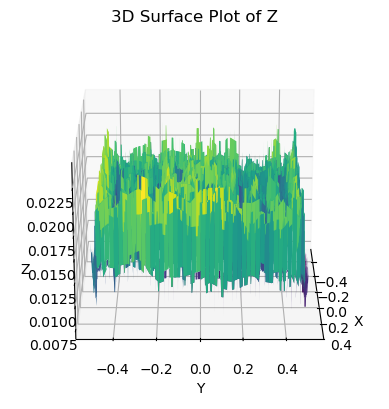

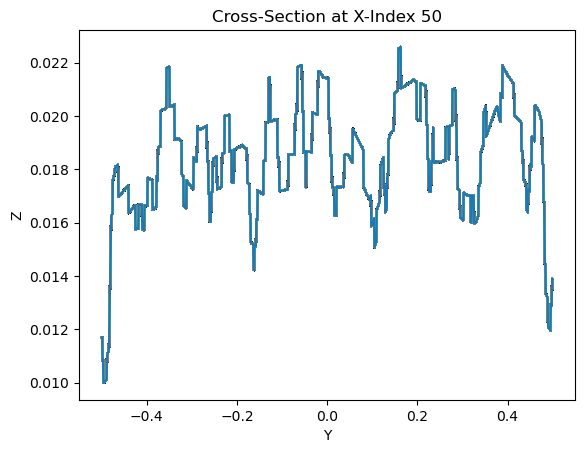

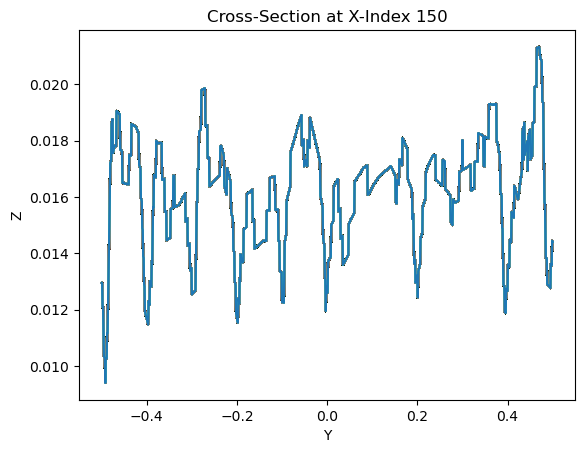

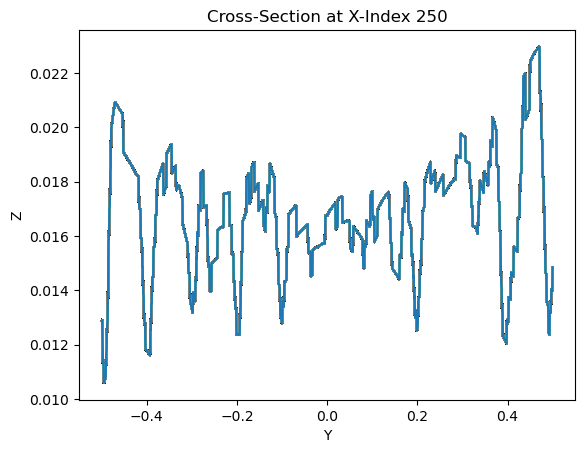

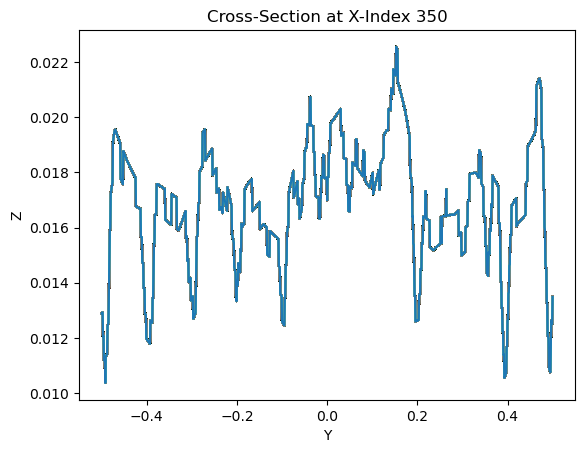

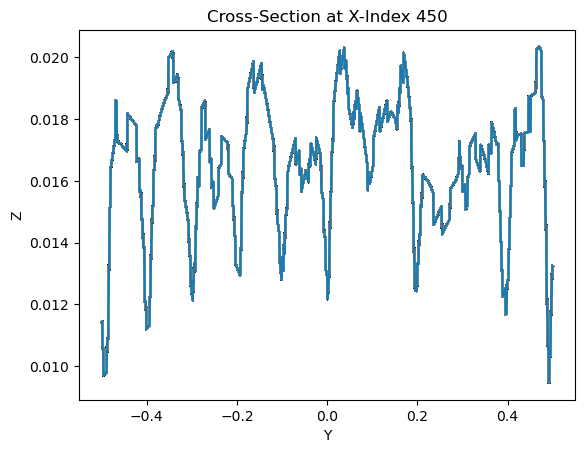

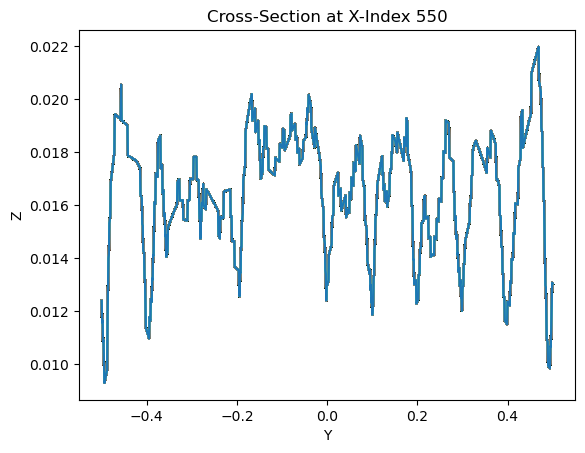

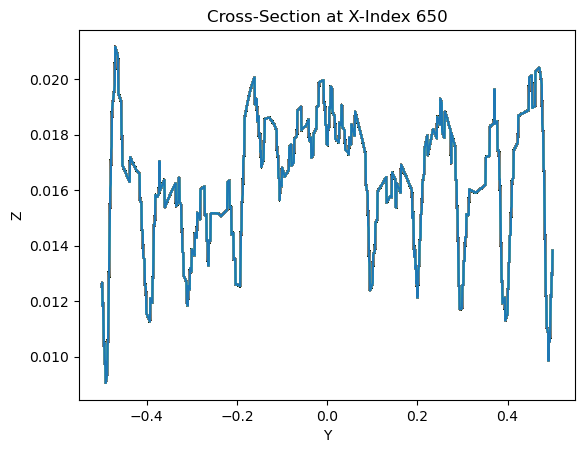

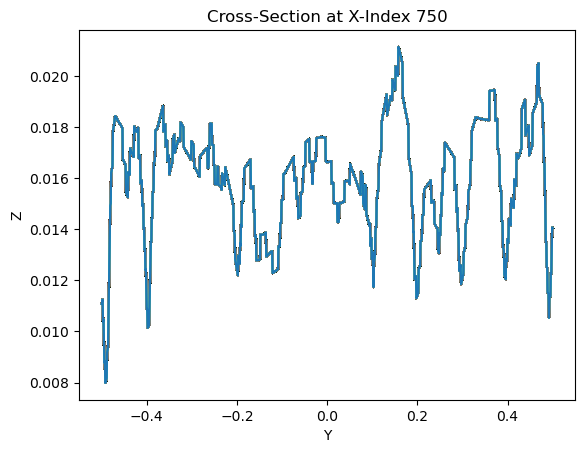

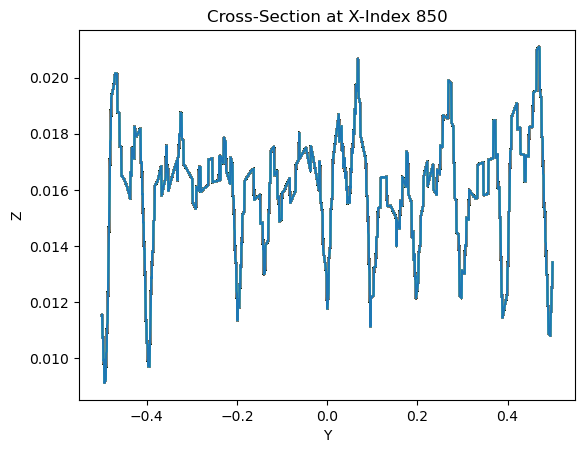

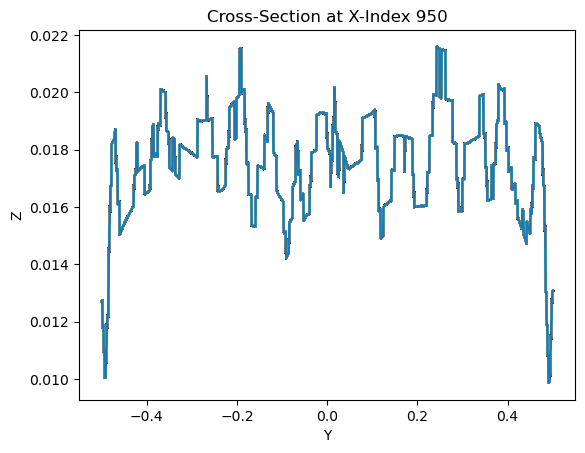

In [17]:
%matplotlib inline
# Number of slices
num_slices = 10

# Create the slices
for i in range(num_slices):
    # Choose an index for the cross-section along the x-axis
    slice_index = int((i + 0.5) * (z_numpy.shape[0] / num_slices))  # Replace this with a suitable value within [0, 1000]

    # Extract the slice
    z_slice = z_numpy[slice_index, :]

    # Plotting
    plt.figure()
    plt.plot(y, z_slice)
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title(f'Cross-Section at X-Index {slice_index}')
    plt.savefig(render_output_path / f'cross_section_{slice_index}.jpeg')
    # plt.show()
